Consider the equation 
\begin{equation}
    \partial_t u + \partial_x \left( \frac{u^2}{2}\right), \quad x, t \in (0,5)
\end{equation}
with initial conditions 
\begin{equation}
    u(x,0) = u_0(x) = 
        \begin{cases}
           1 & x< 1\\
           0 & x \geq 1
        \end{cases}
\end{equation}
and 
\begin{equation}
    u(0,t) = 1.
\end{equation}
Let $\Delta x, \Delta t> 0$ and set $N_x = 5/\Delta x, N_t = 5/\Delta t$. Then for each index $j \in \{1, \dots, N_x-1\}$ and $n \in \{0 ,\dots N_t\}$ consider 
\begin{equation}
    \int_{x_{j-1/2}}^{x_{j+1/2}} \int_{t_n}^{t_{n+1}} \partial_t u + \partial_x \left( \frac{u^2}{2}\right) dx dt = 0.
\end{equation}
We can integrate by parts with $f(u) = u^2/2$ to obtain 
\begin{equation}
    -\int_{x_{j-1/2}}^{x_{j+1/2}} u(x, t_{n+1}) - u(x, t_n) dx - \int_{t_n}^{t_{n+1}} f(u(x_{j+1/2},t)) - f(u(x_{j-1/2},t))dt = 0.
\end{equation}
Now define the spacial average
\begin{equation}
    U_j^n : = \frac{1}{\Delta x} \int_{x_{j-1/2}}^{x_{j+1/2}} u(x, t_n) dx.
\end{equation}
We can approximate our initial conditions by setting 
\begin{equation}
    U_0^n = 1, \qquad U_j^{0} = u_0(x_{j}).
\end{equation}
Now, since $u \geq 0$, we can check that $f'(u) = u \geq 0$. Hence our upwinding scheme involves backwards differences. That is, if we define
\begin{equation}
    \overline{F}_{j+1/2}^n = \frac{1}{\Delta t} \int_{t_n}^{t_{n+1}} f(u(x_{j+1/2},t)) dt
\end{equation}
we can approximate 
\begin{equation}
    \overline{F}_{j+1/2}^n \approx f(U_j^n), \qquad \overline{F}_{j-1/2}^n \approx f(U_{j-1}^n).
\end{equation}
Then our scheme becomes 
\begin{equation}
    U_j^{n+1} = U_j^{n} - \frac{\Delta t}{\Delta x} \left(f(U_{j}^n) - f(U_{j-1}^n)\right)
\end{equation}

In [33]:
import numpy as np
import math

def upwind_burgers(dx, dt):
    """Input: dx, dt mesh sizes
       Output: U[space, time] solution"""
    def u_0(x):
        """Set the initial condition u_0"""
        if x < 1:
            return 1
        else:
            return 0
    
    def f(u):
        return u ** 2/2

    N_x = int(5/dx)                   #Number of spacial points
    N_t = int(5/dt)                   #Number of temportal points
    U = np.zeros([N_x, N_t+1])        #Initialize solution as numpy array
    for j in range(N_x):
        U[j,0] = u_0(5*j/N_x)         #Set initial condition in space
    
    for n in range(N_t):
        U[0,n] = 1                    #Set initial condition in time
    
    for n in range(N_t):              #Upwind scheme
        for j in range(1,N_x):
            U[j,n+1] = U[j,n] - (dt/dx)*(f(U[j,n])-f(U[j-1,n]))
            
    return U

def exact_burgers(dx, dt):
    def u_0(x):
        """Set the initial condition u_0"""
        if x < 1:
            return 1
        else:
            return 0
    N_x = int(5/dx)                    #Number of spacial points
    N_t = int(5/dt)                    #Number of temportal points
    U_exact = np.zeros([N_x,N_t+1])
    for n in range(N_t+1):
        for j in range(N_x):
            U_exact[j,n] = u_0(5*j/N_x - 5*n/N_t)
    return U_exact

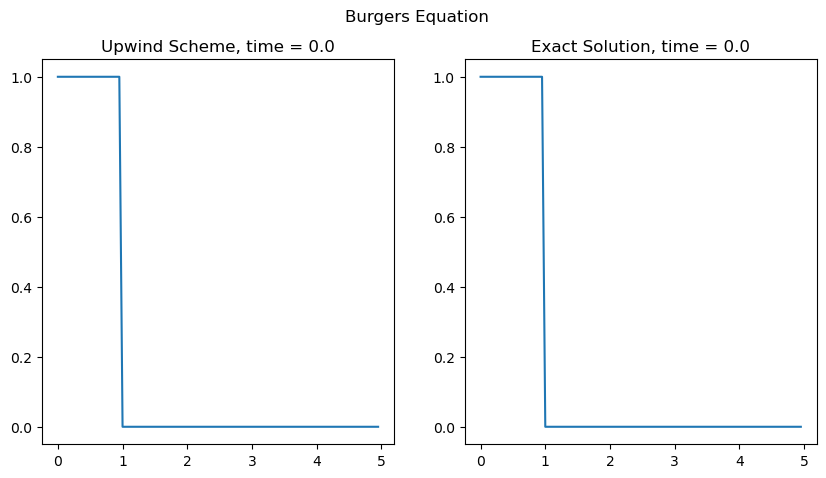

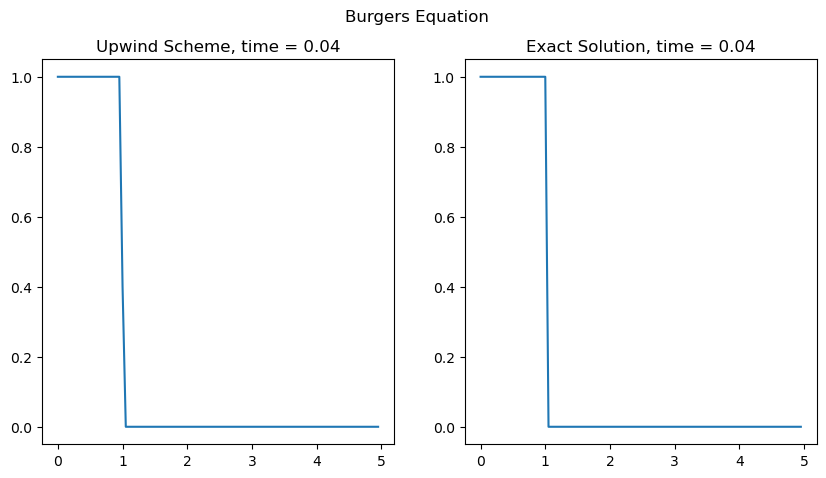

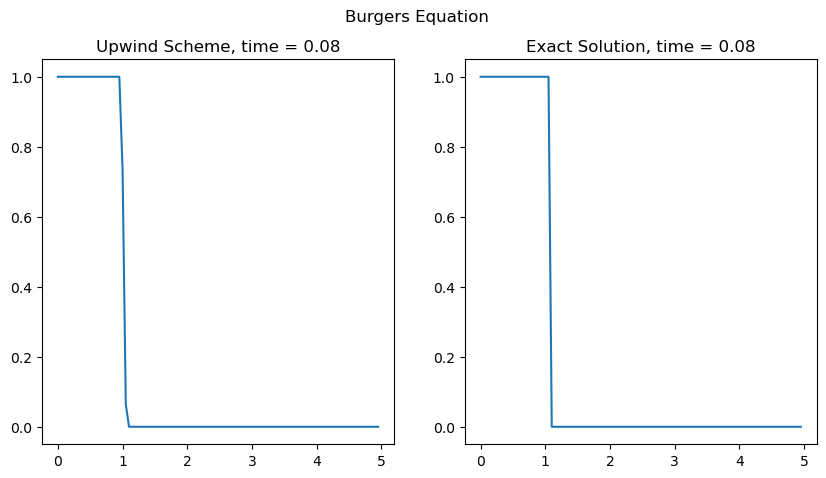

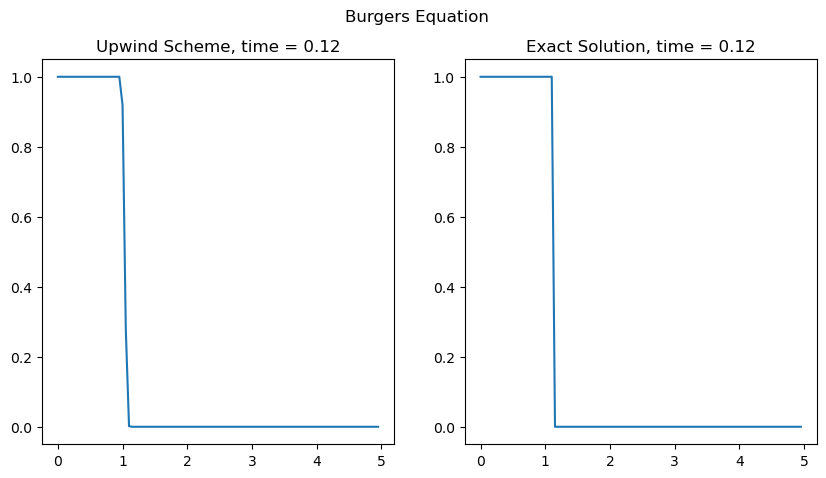

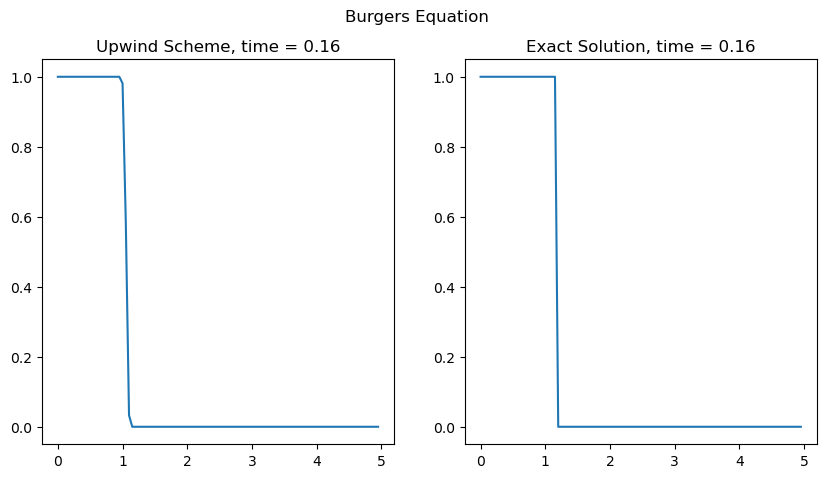

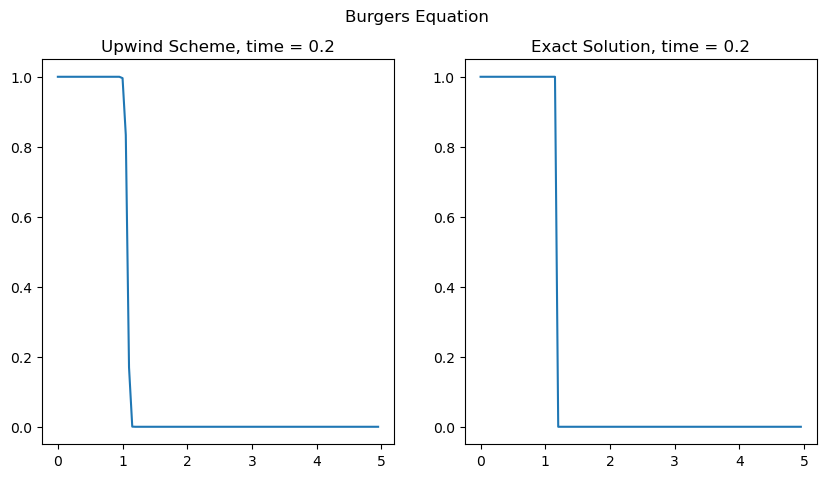

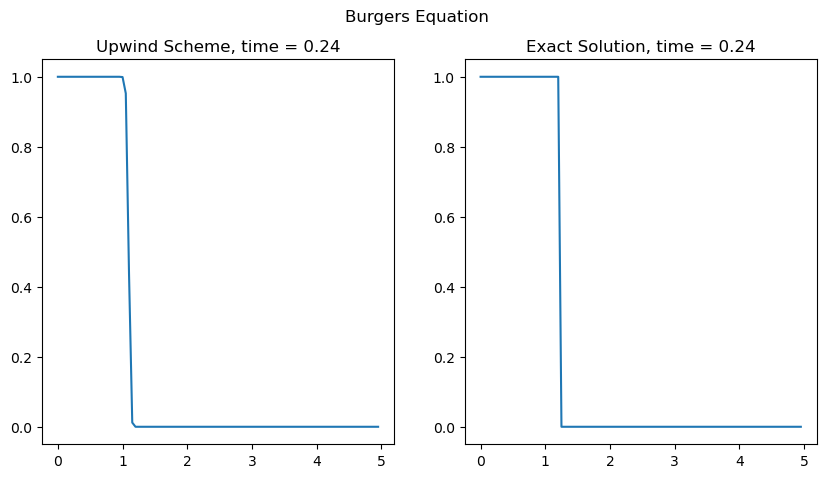

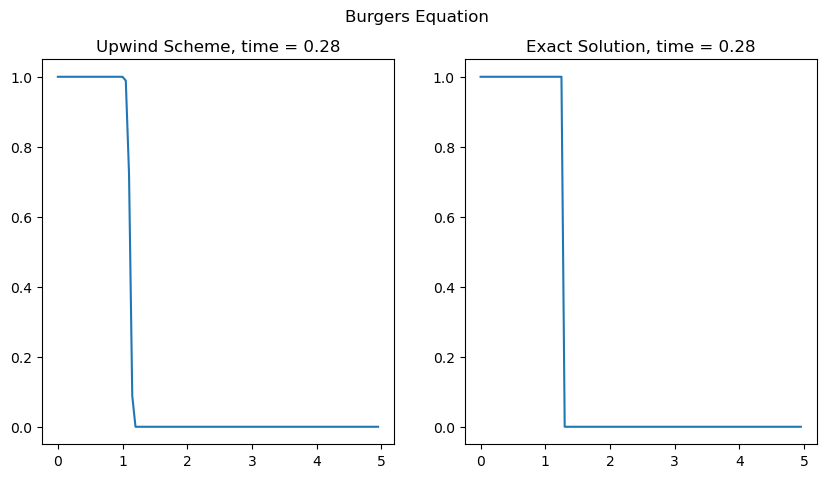

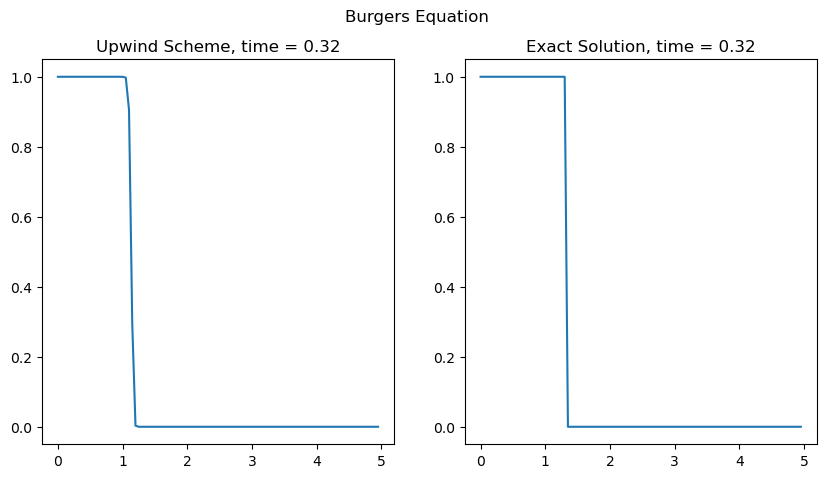

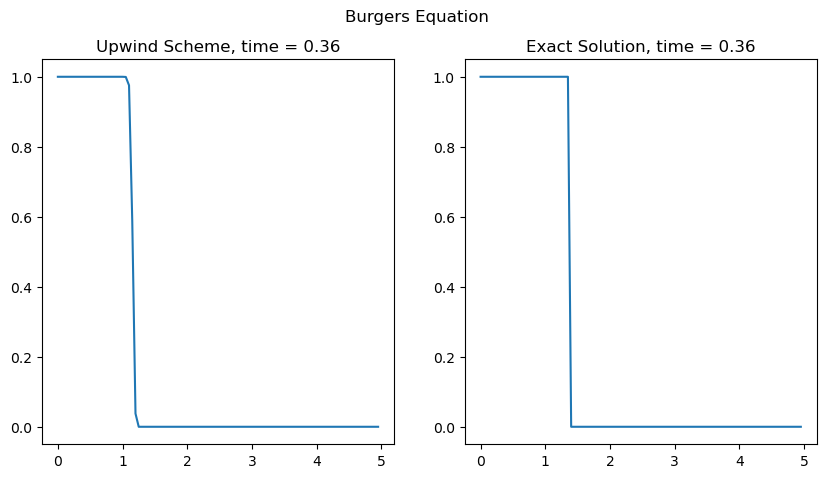

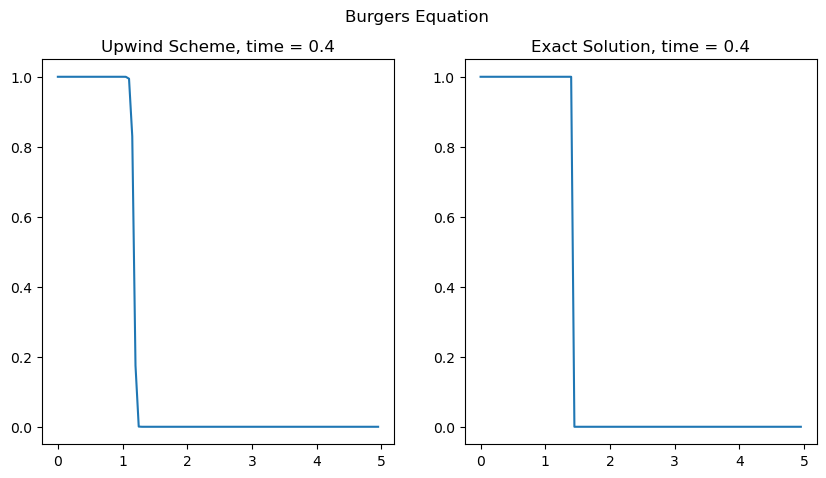

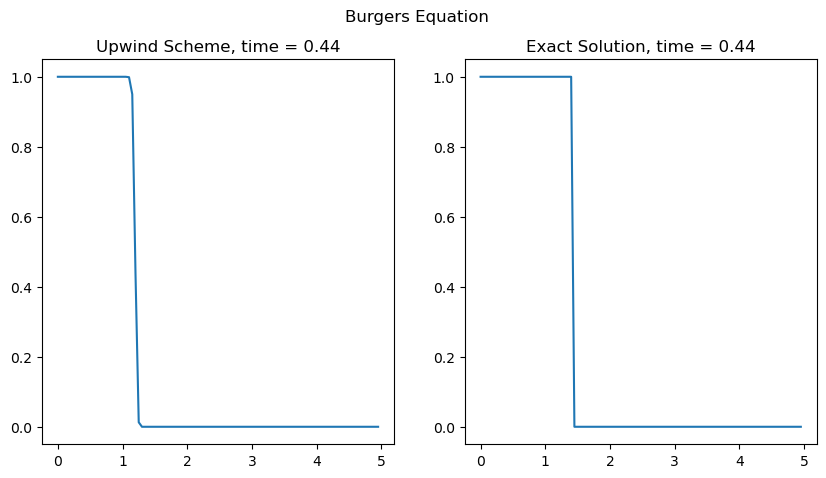

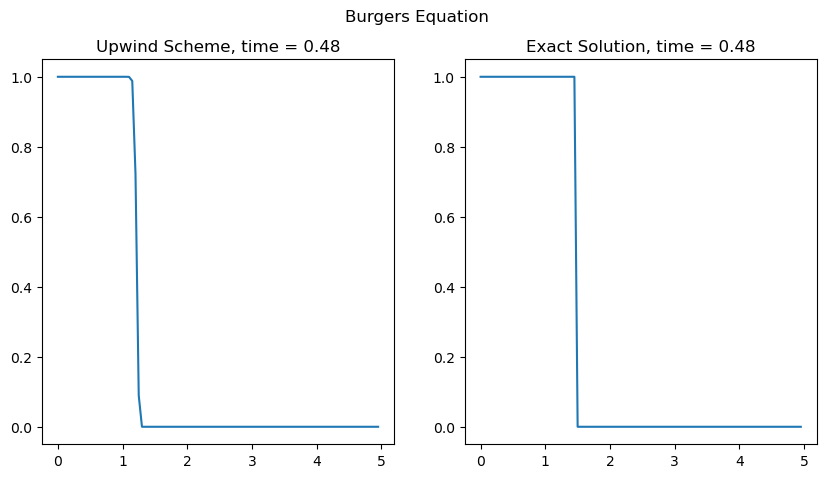

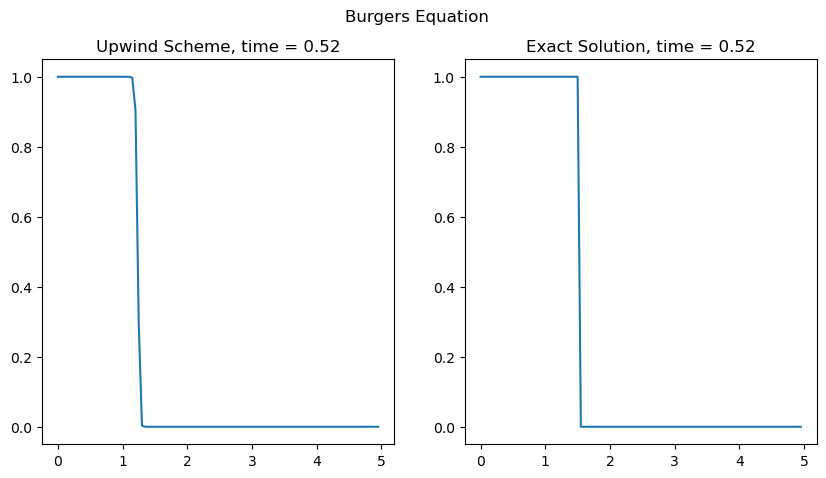

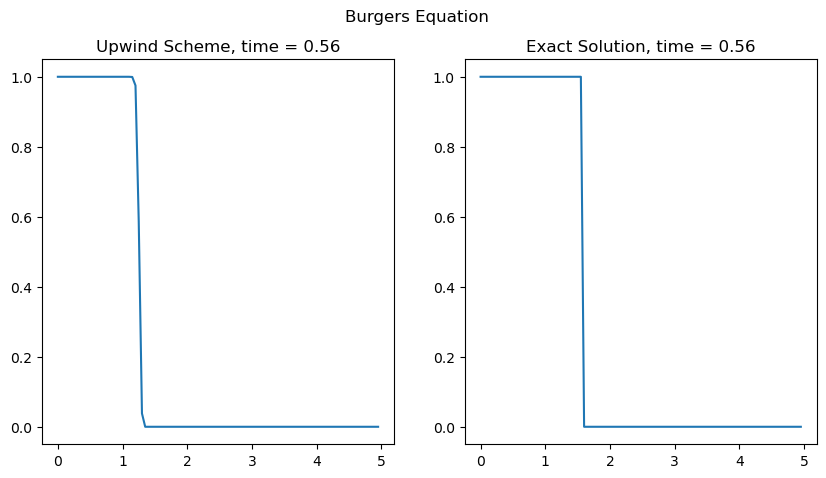

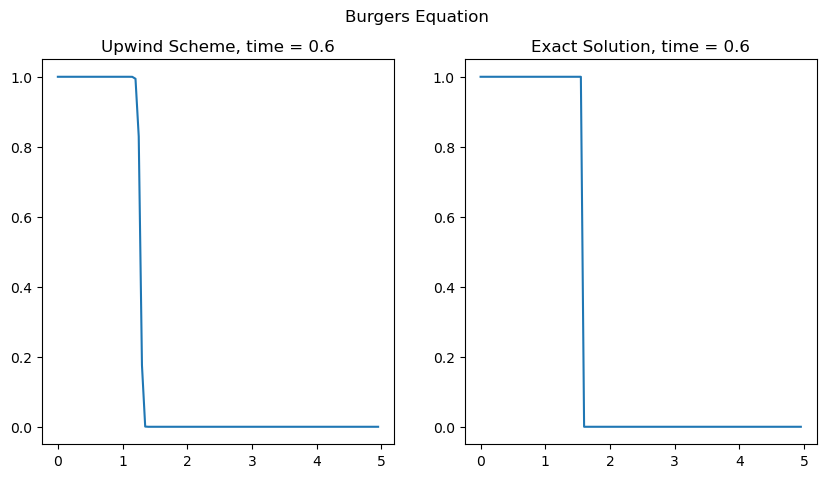

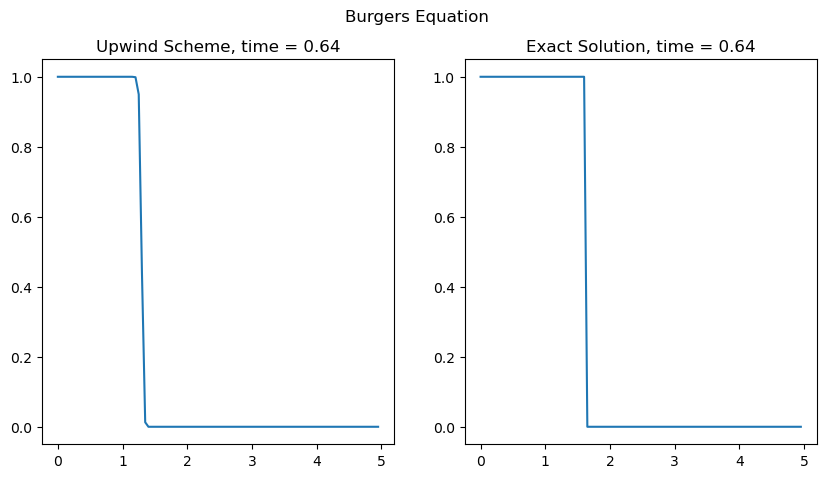

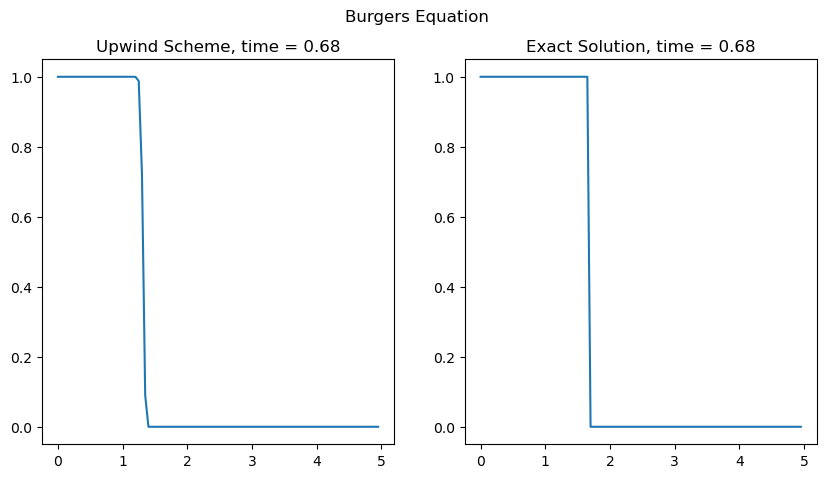

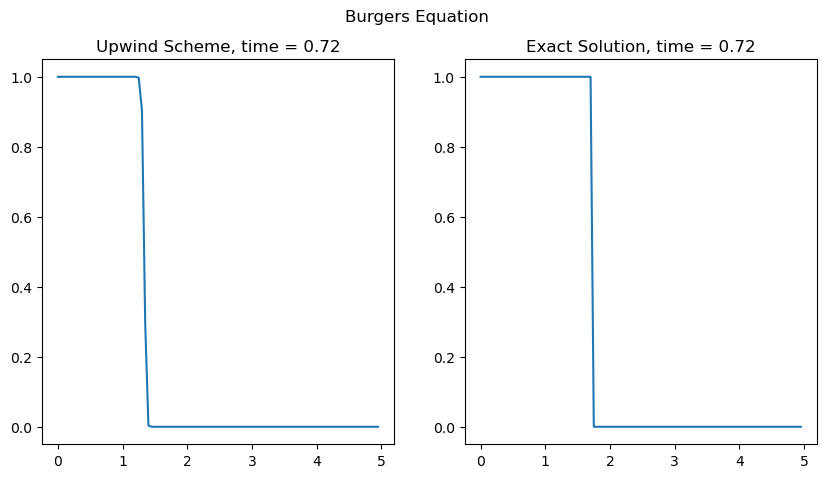

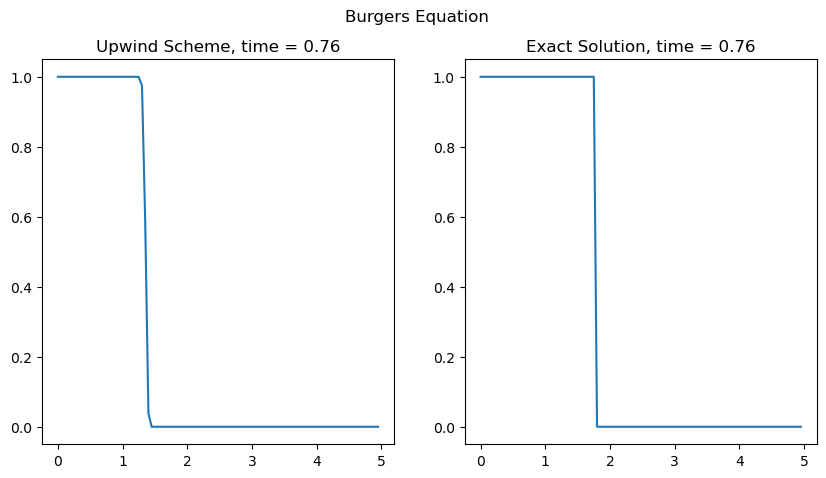

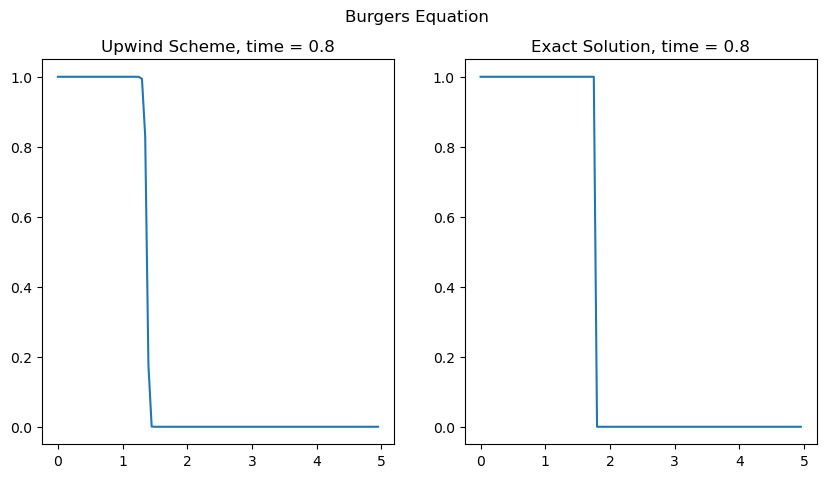

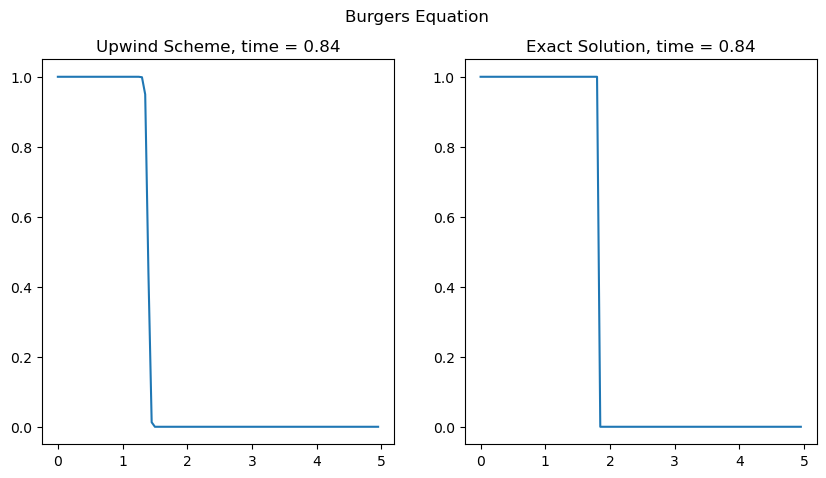

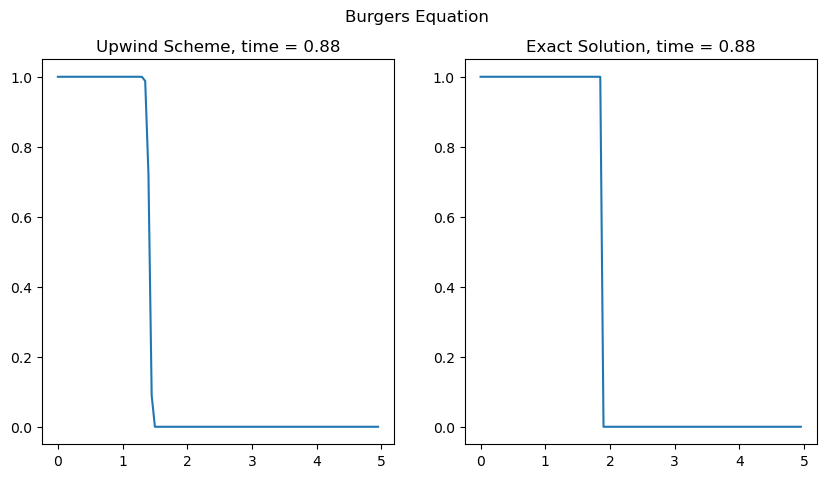

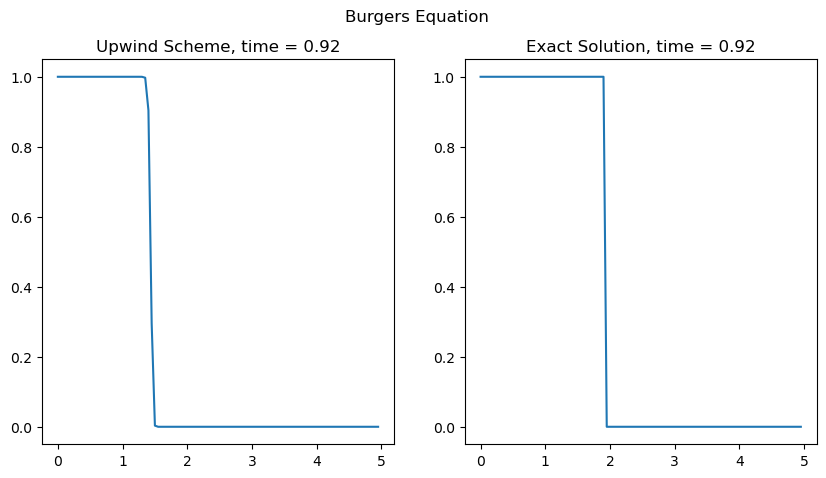

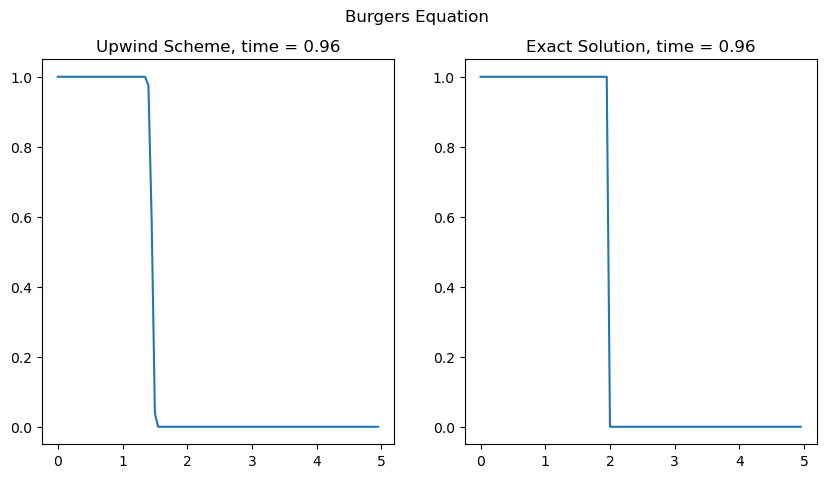

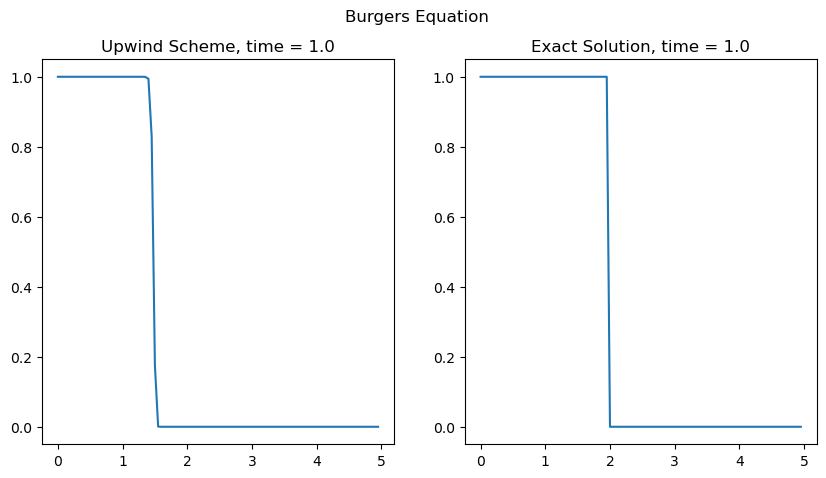

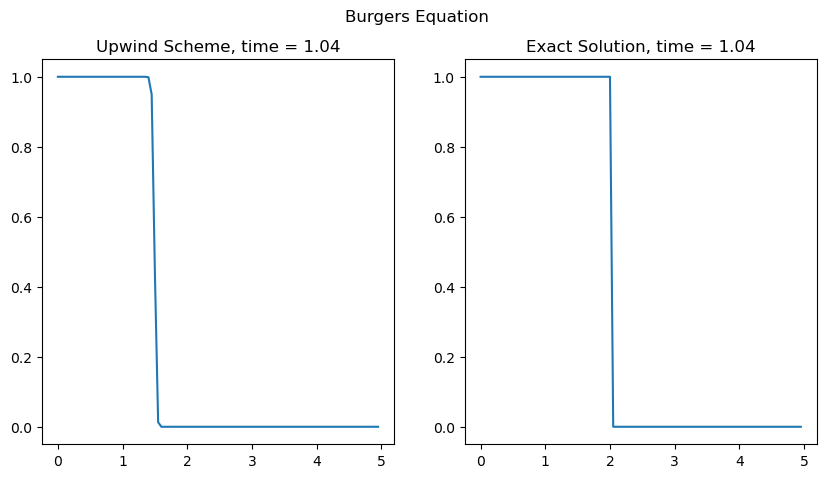

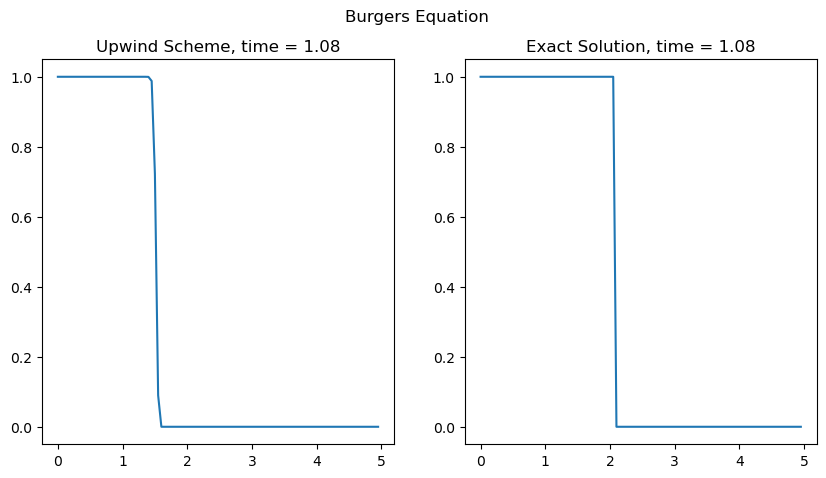

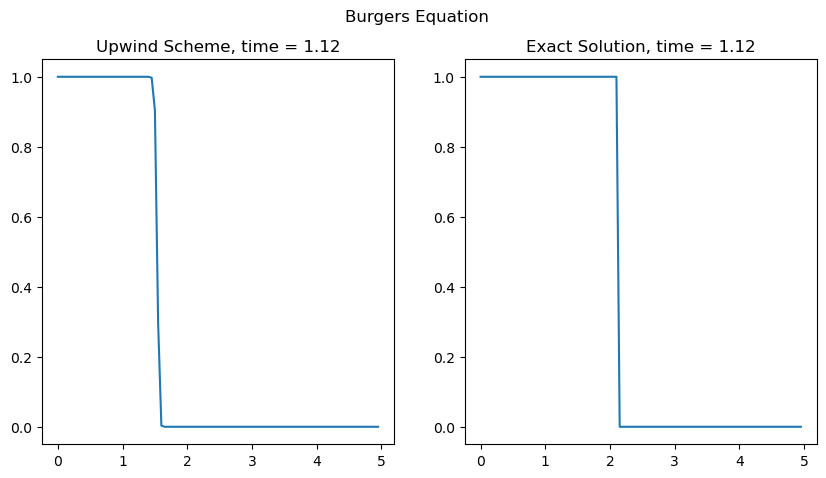

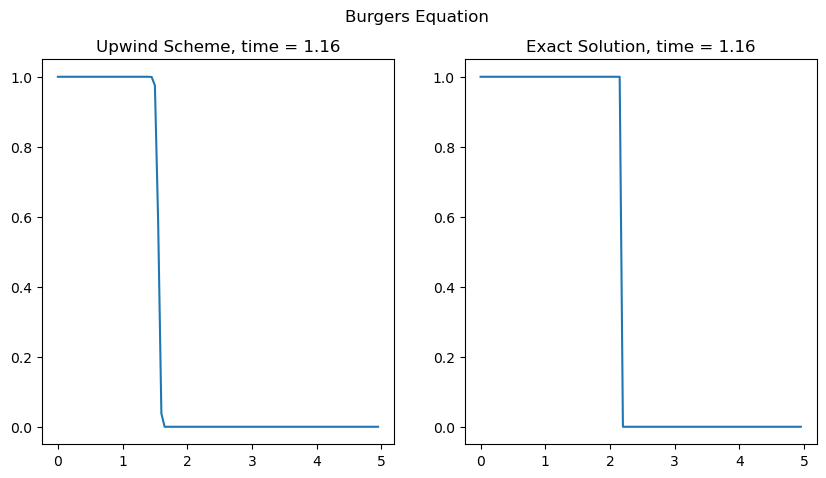

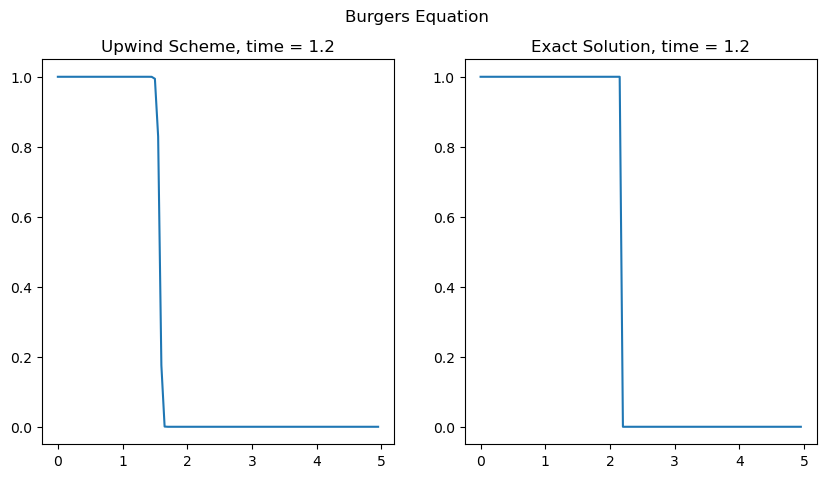

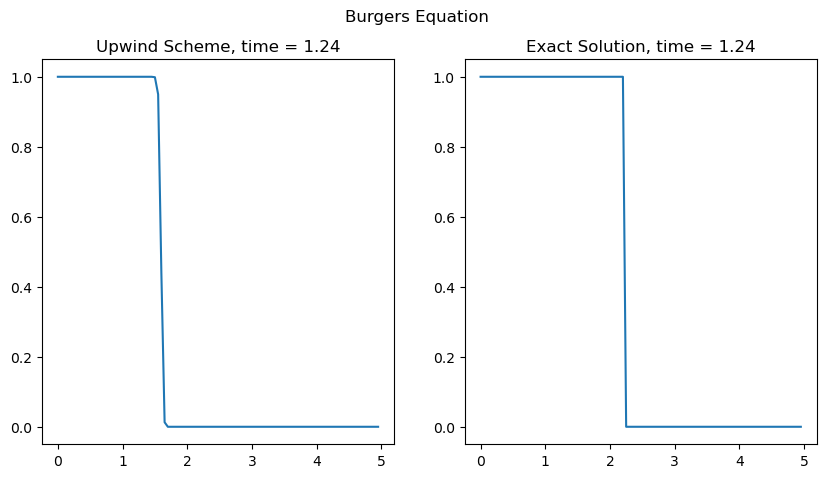

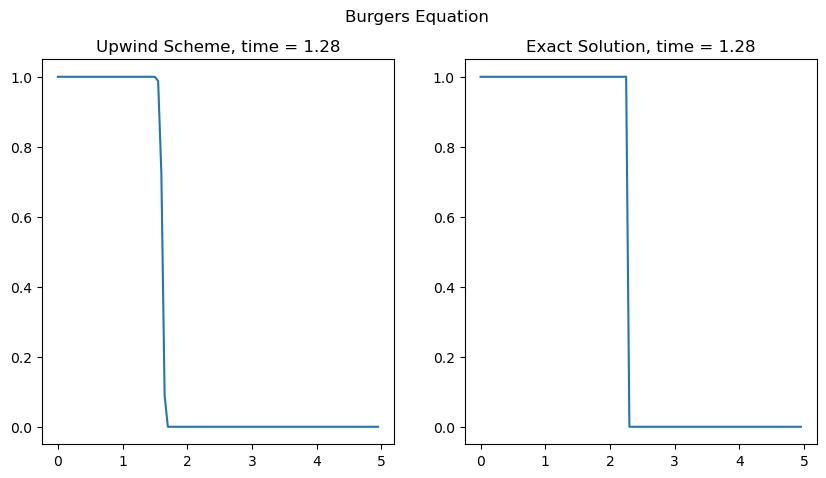

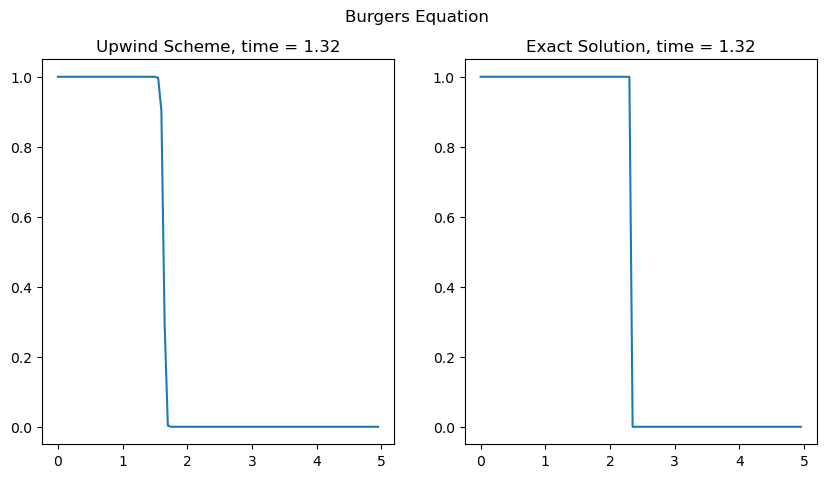

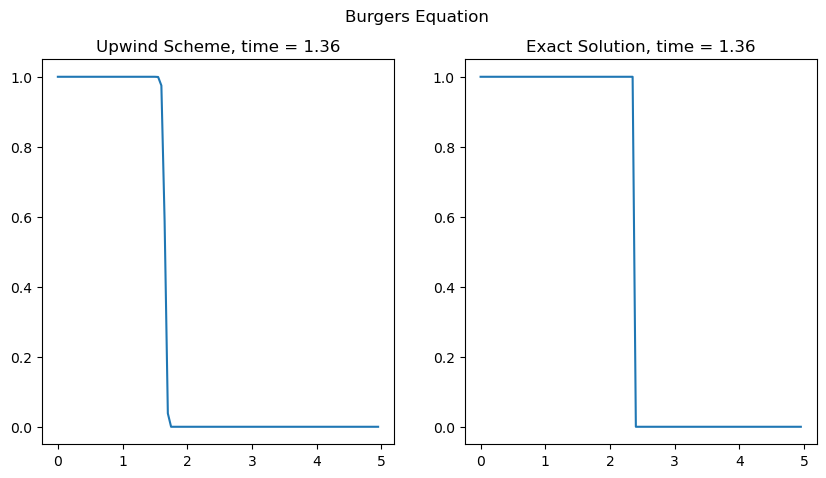

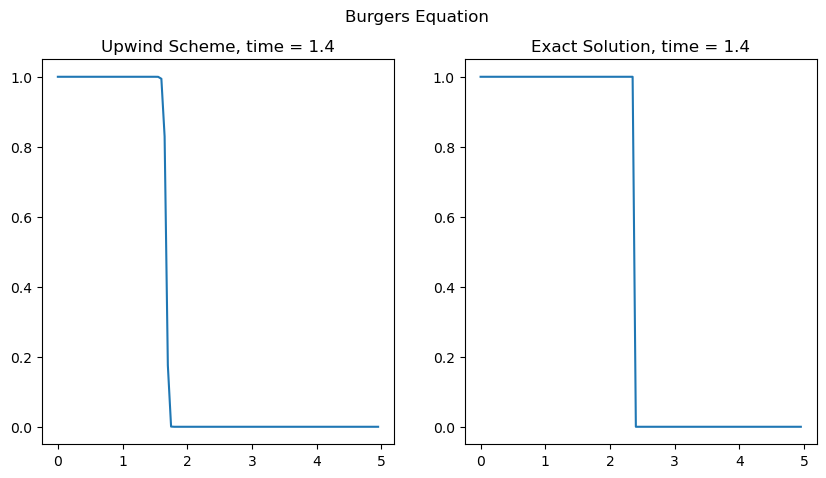

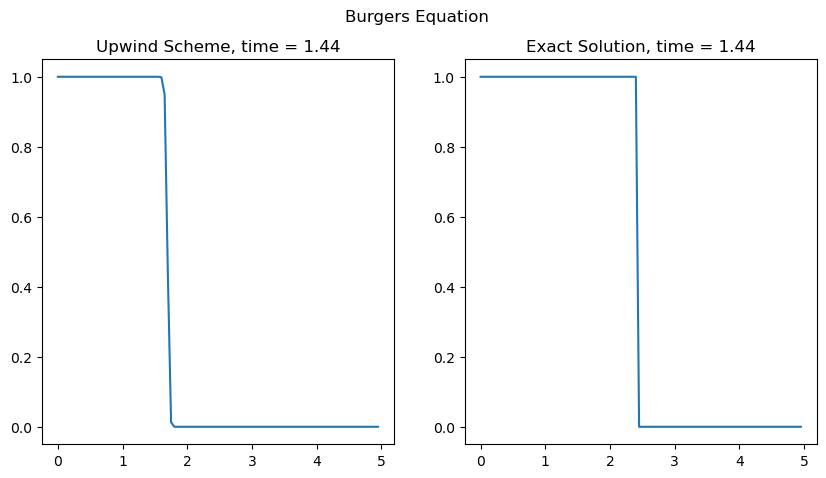

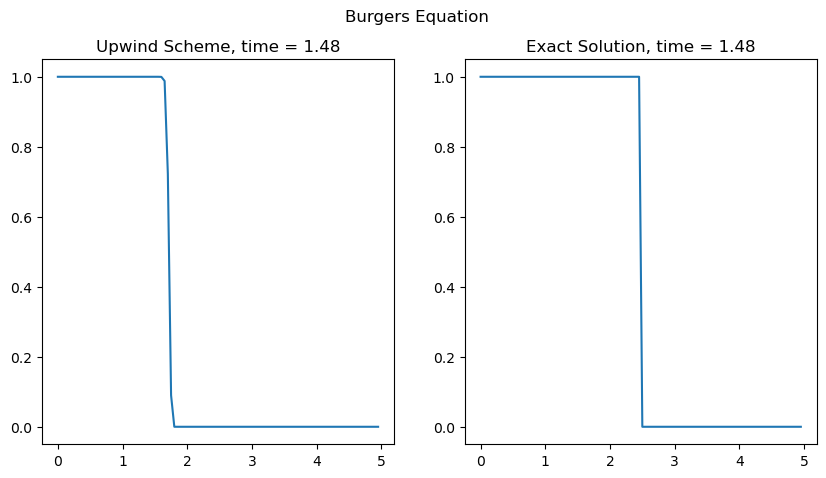

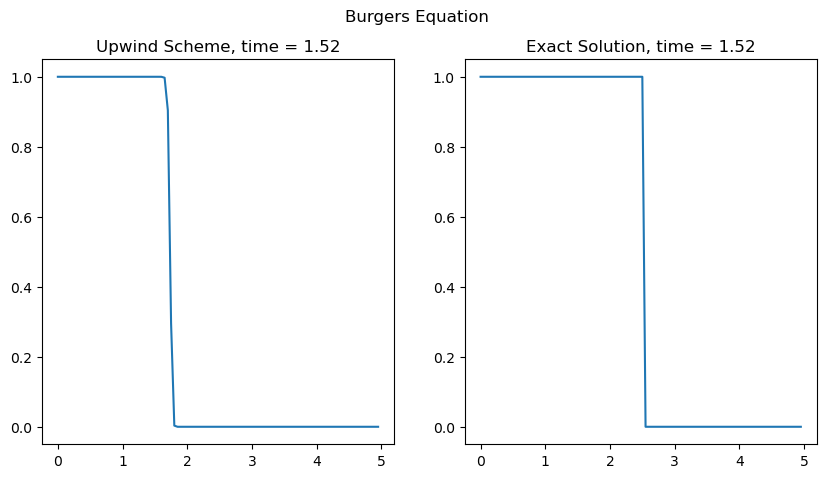

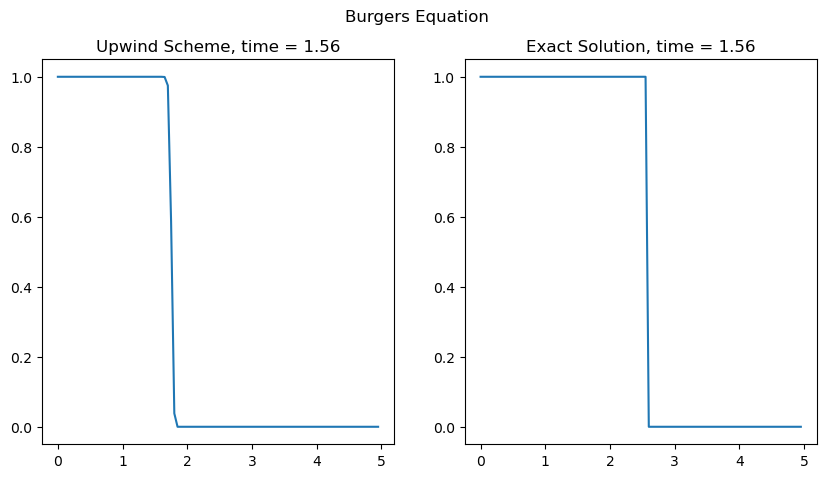

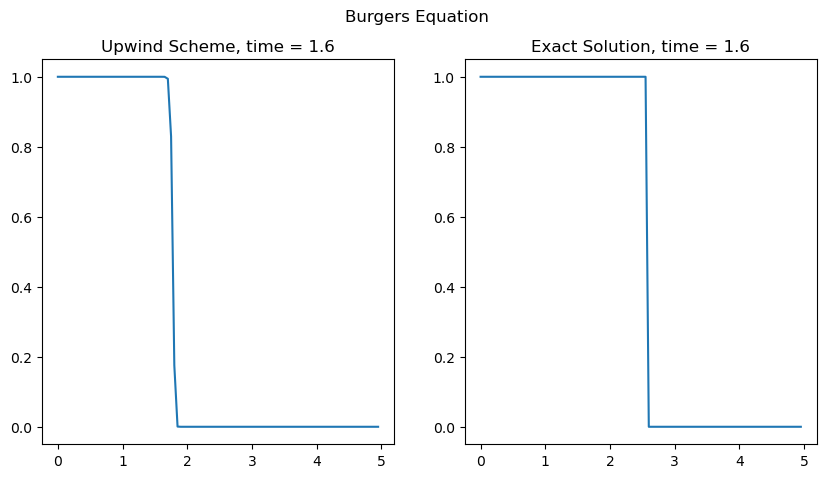

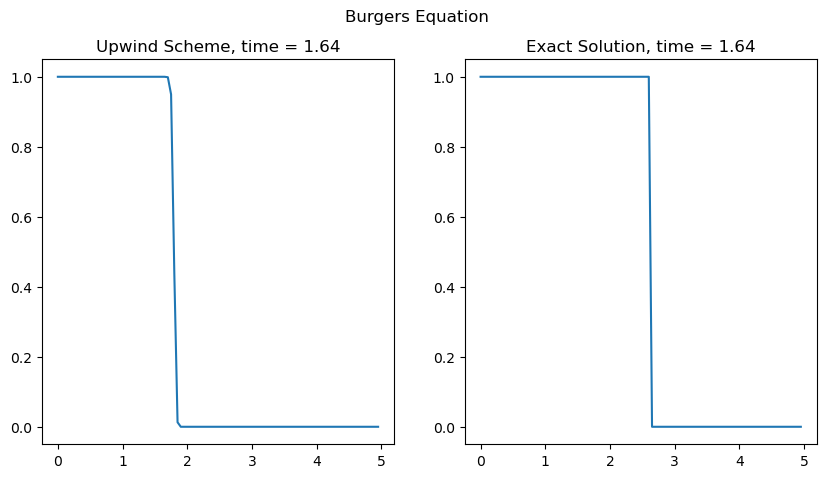

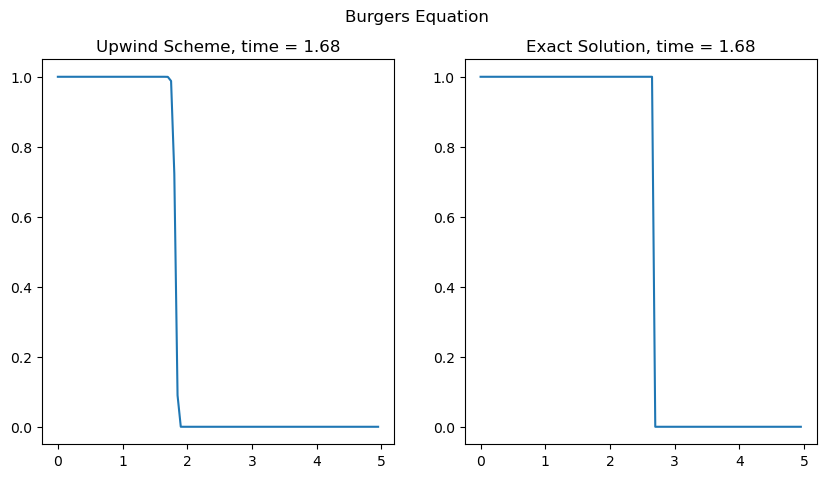

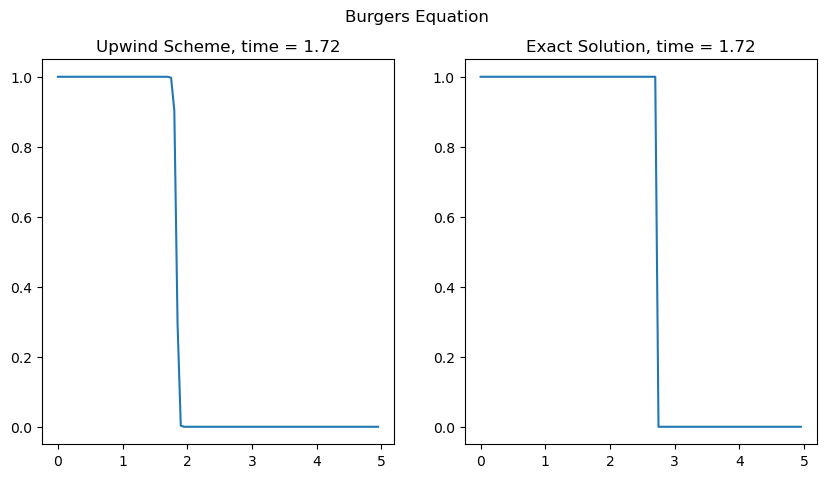

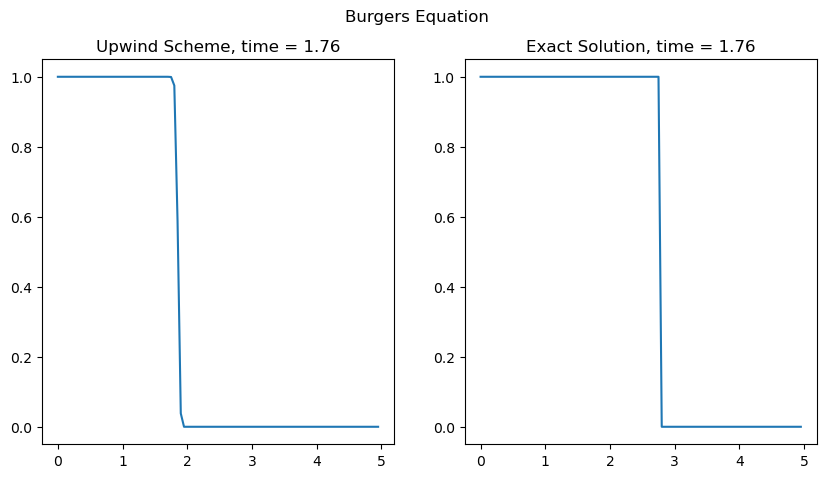

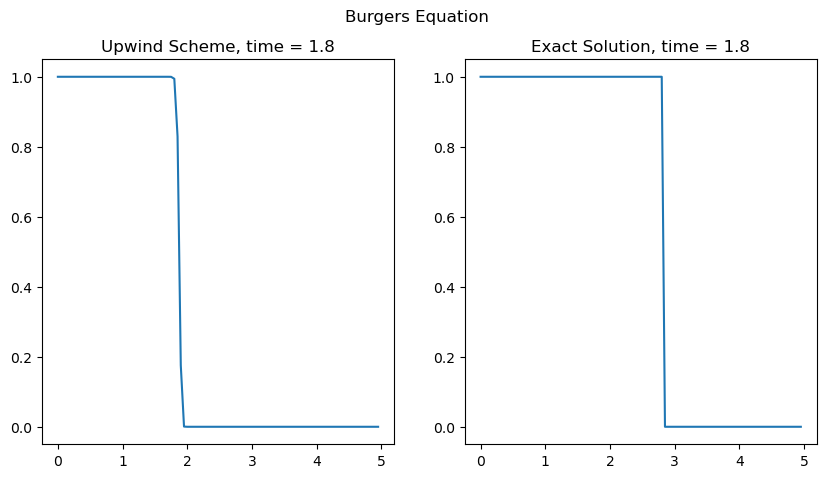

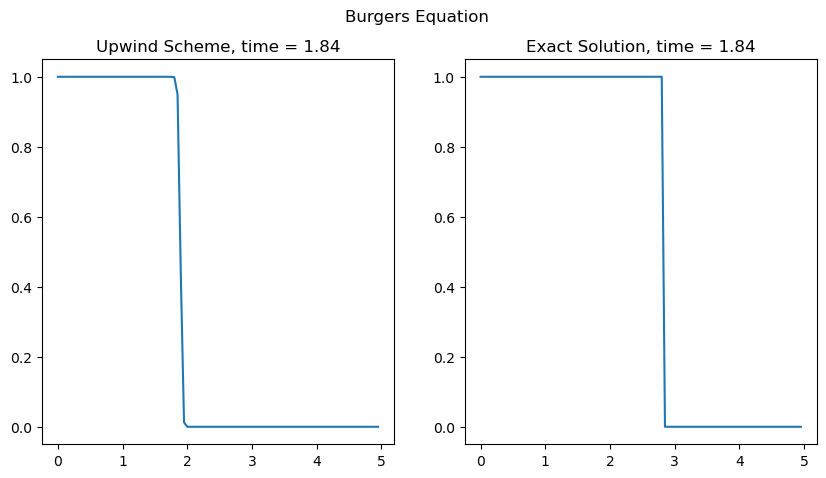

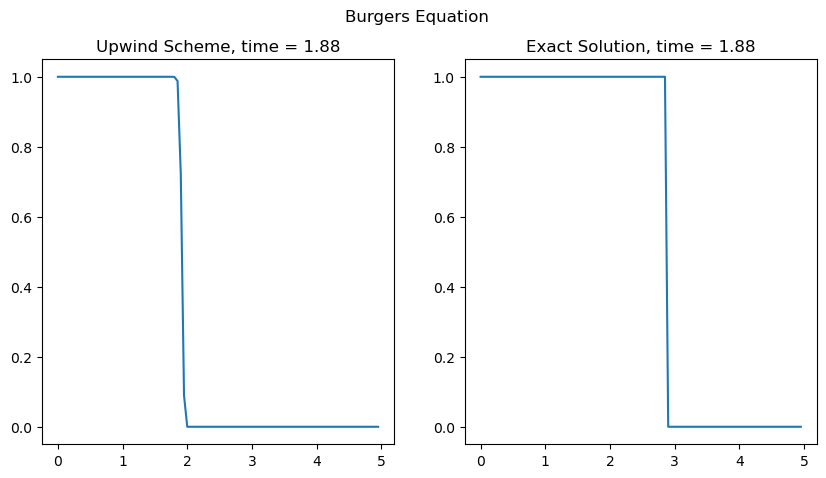

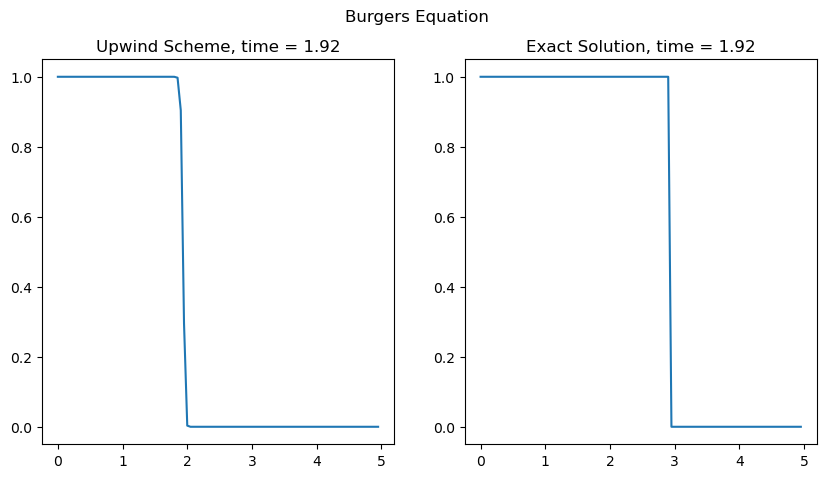

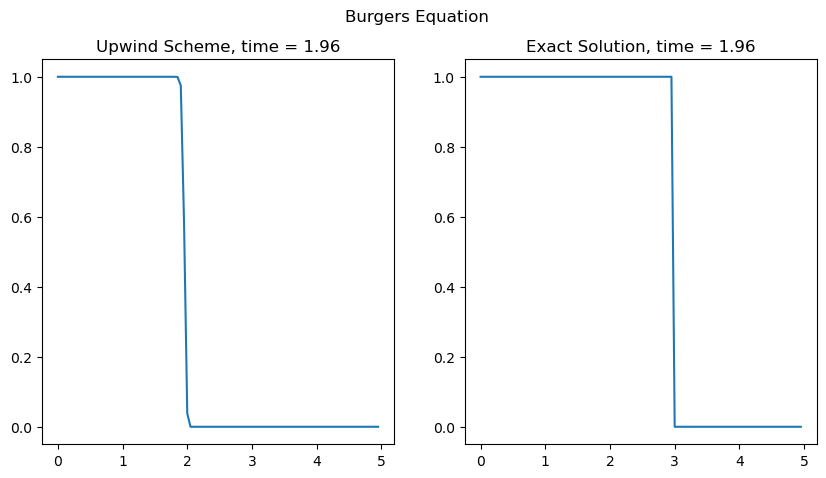

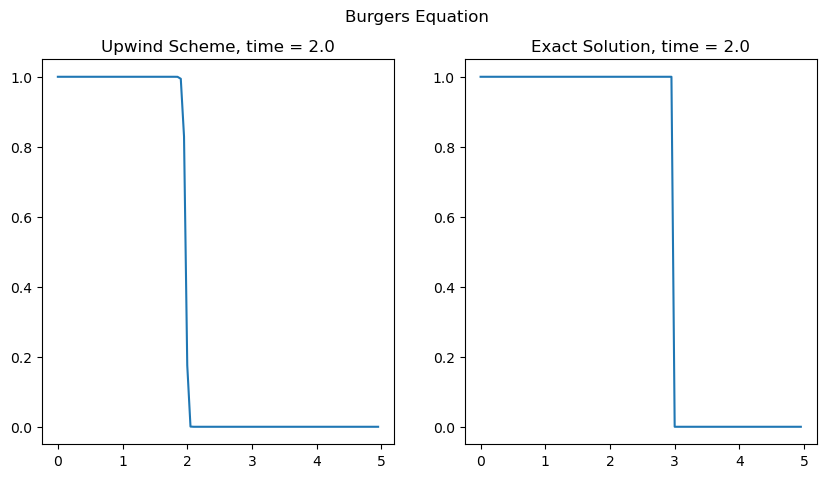

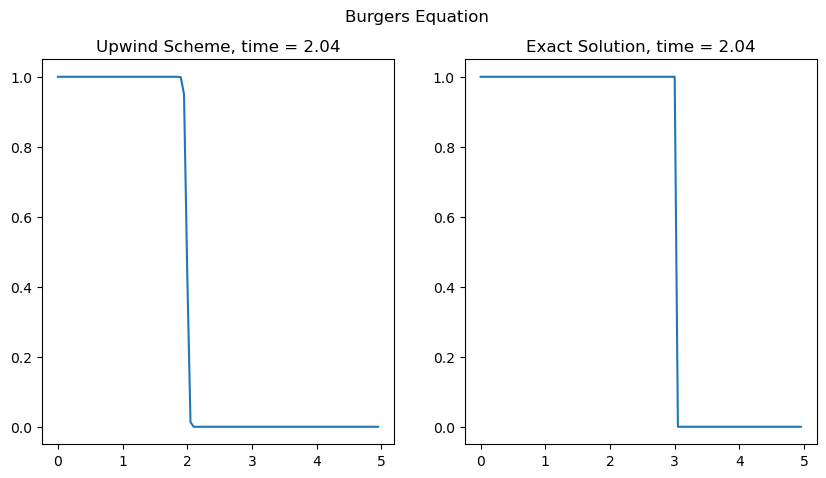

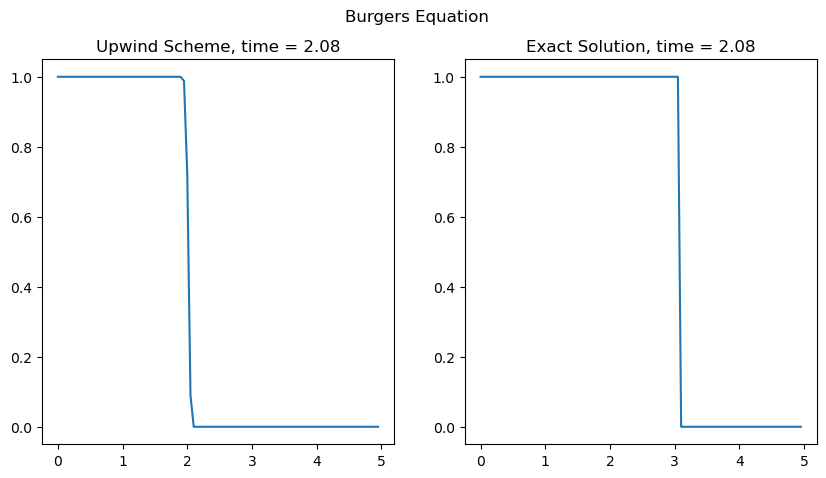

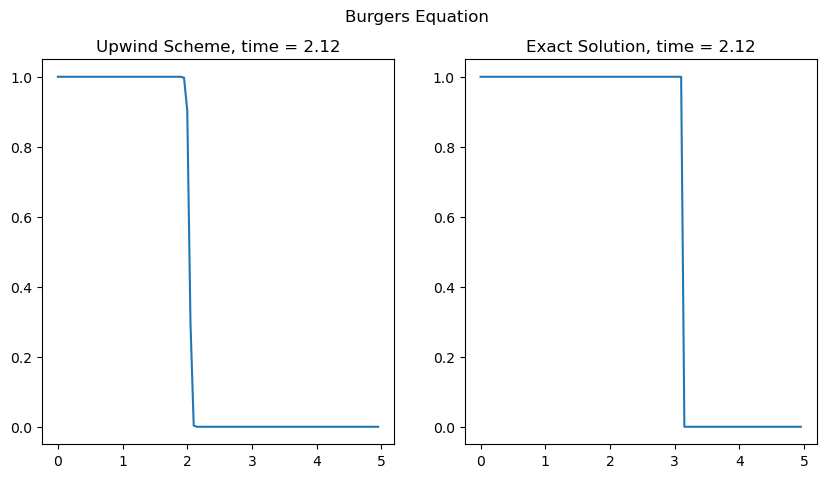

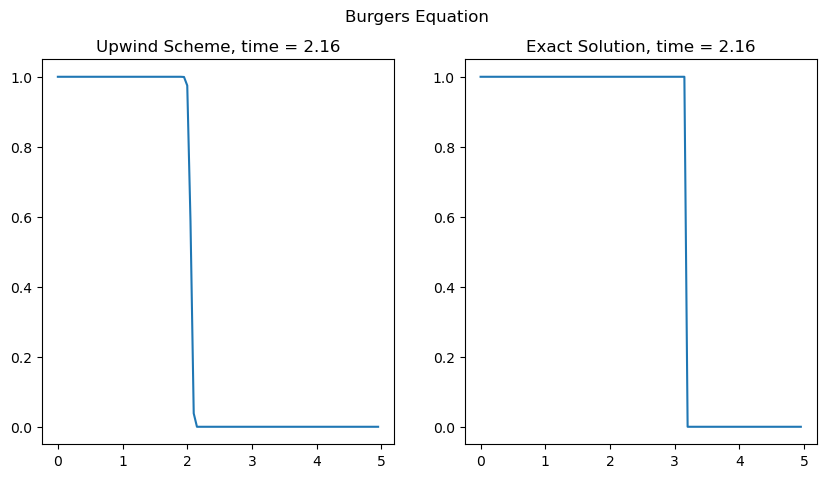

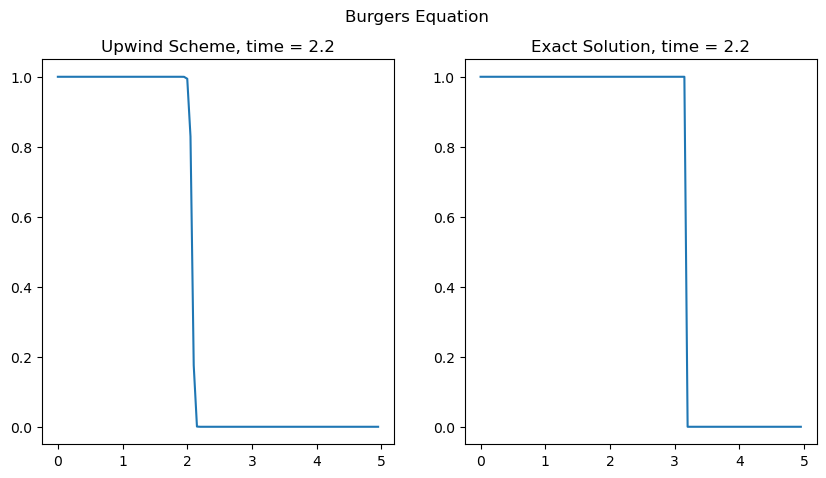

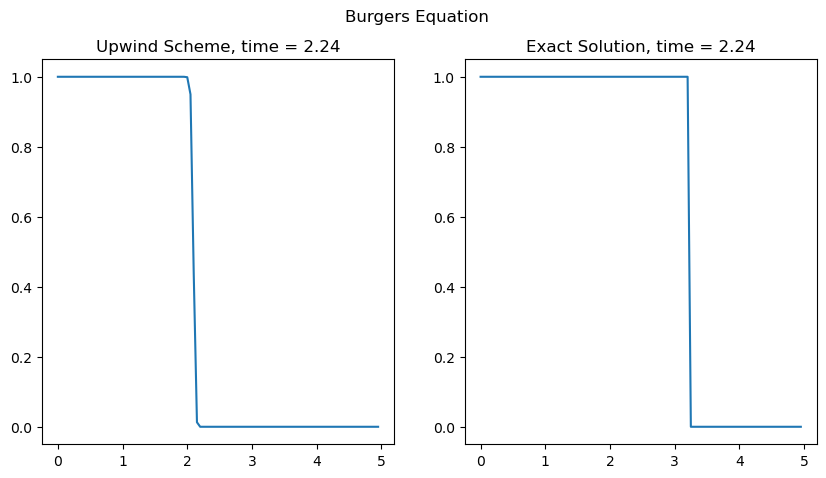

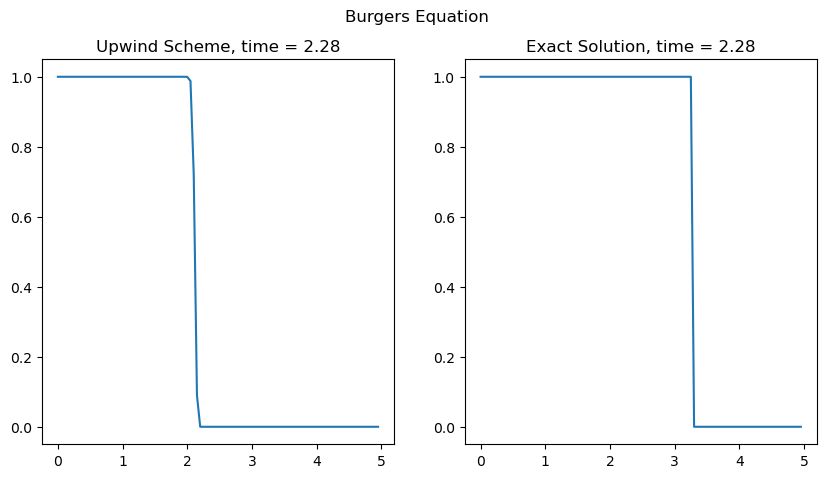

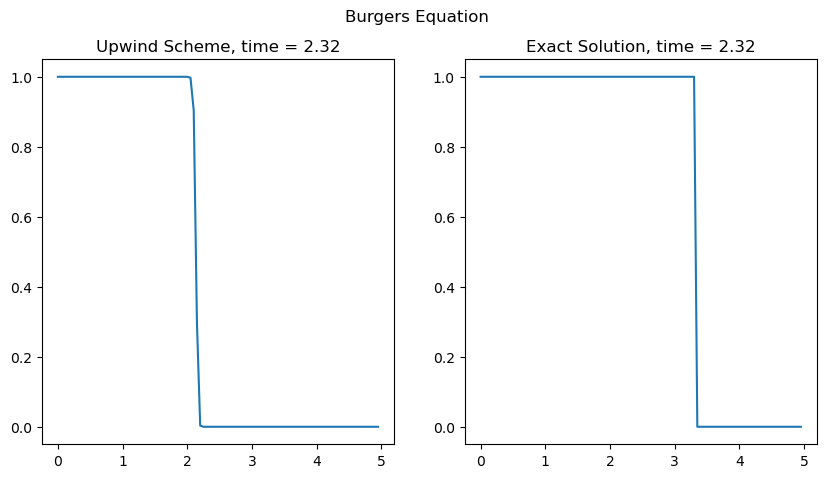

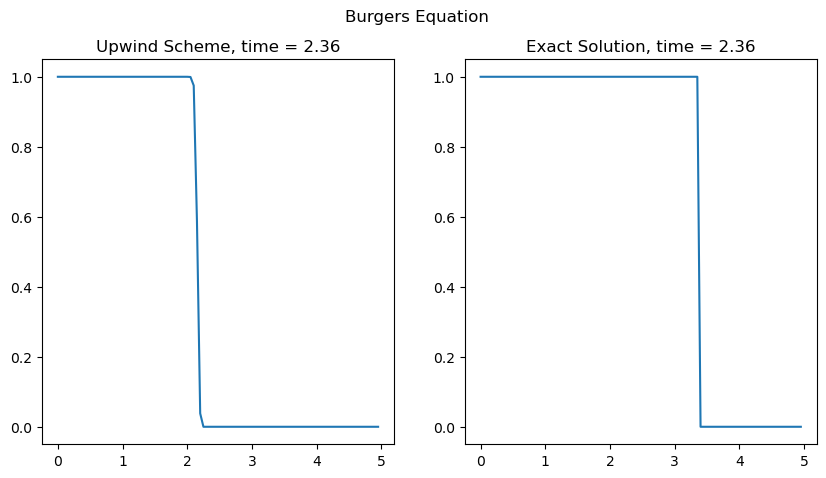

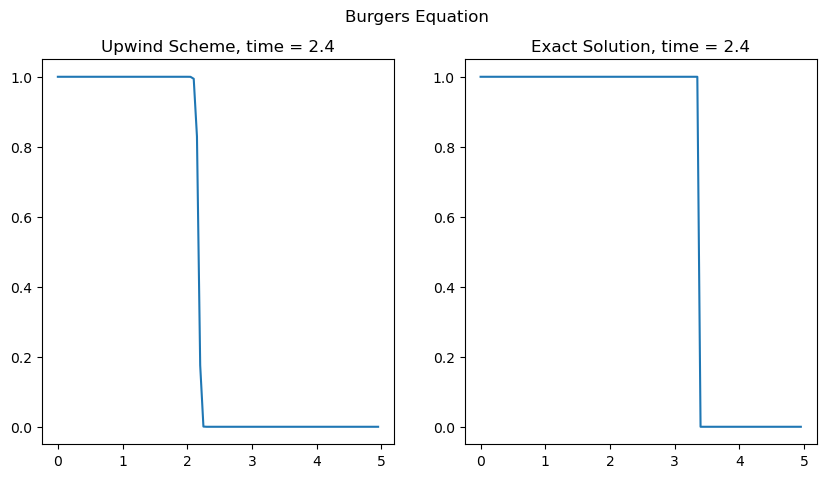

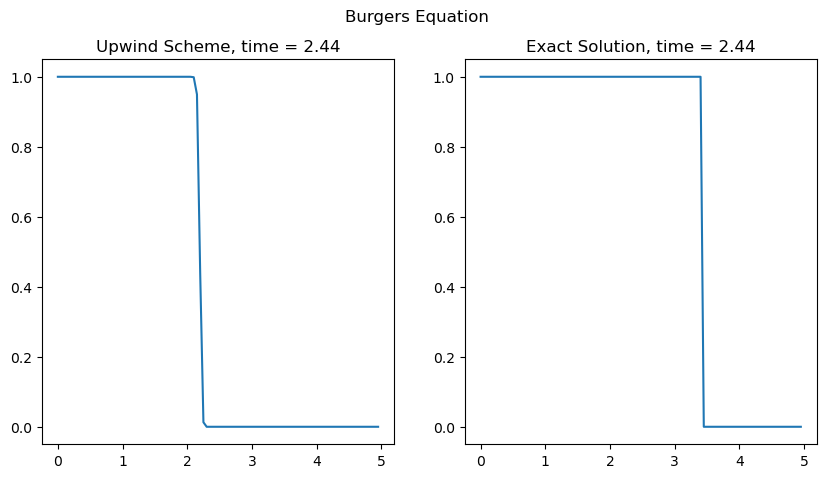

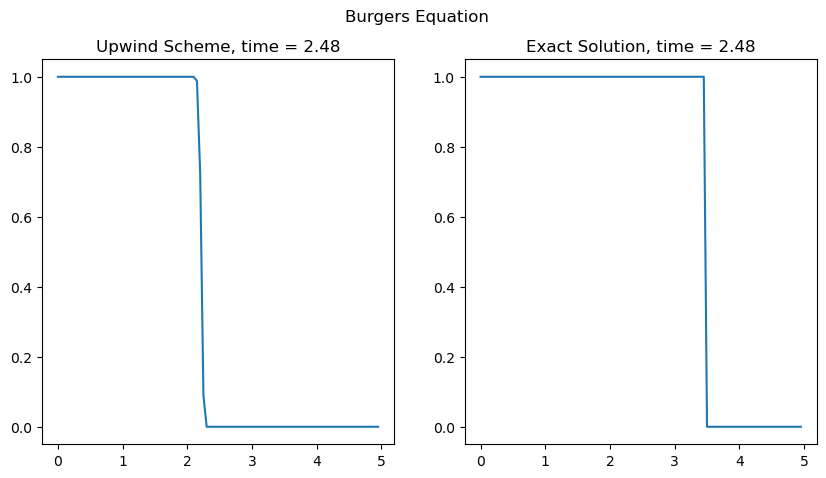

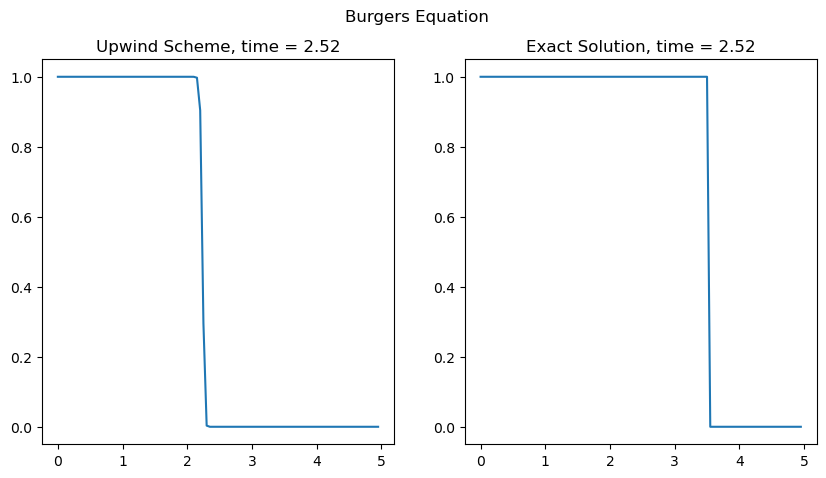

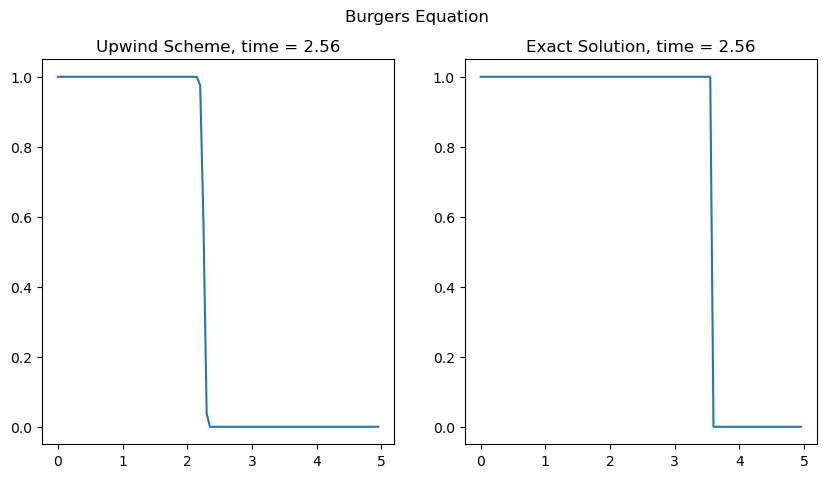

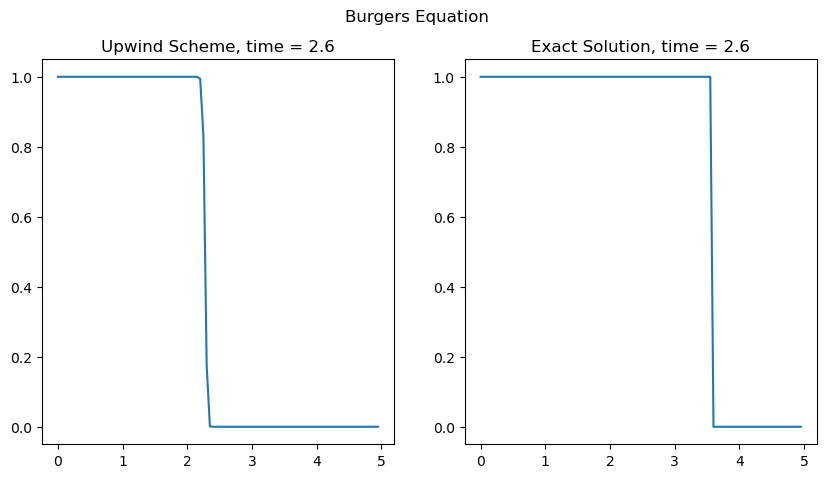

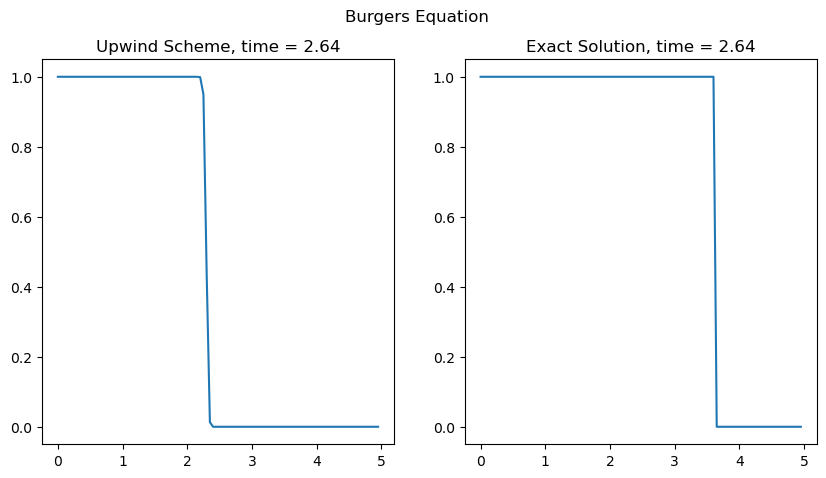

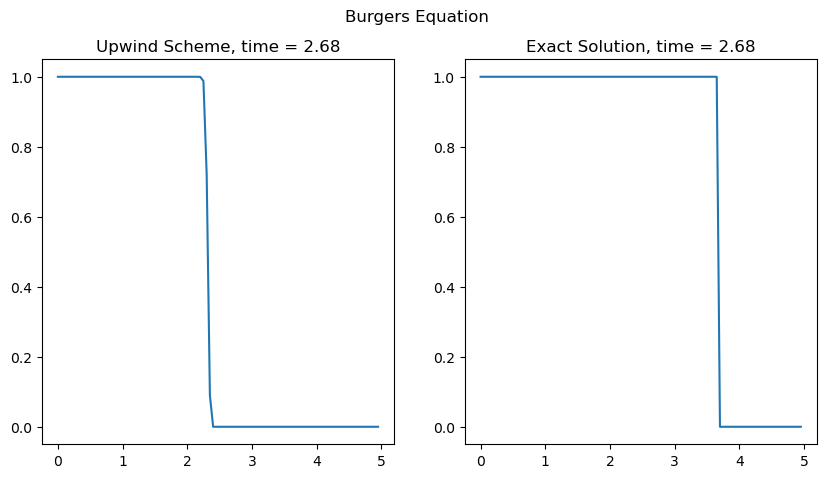

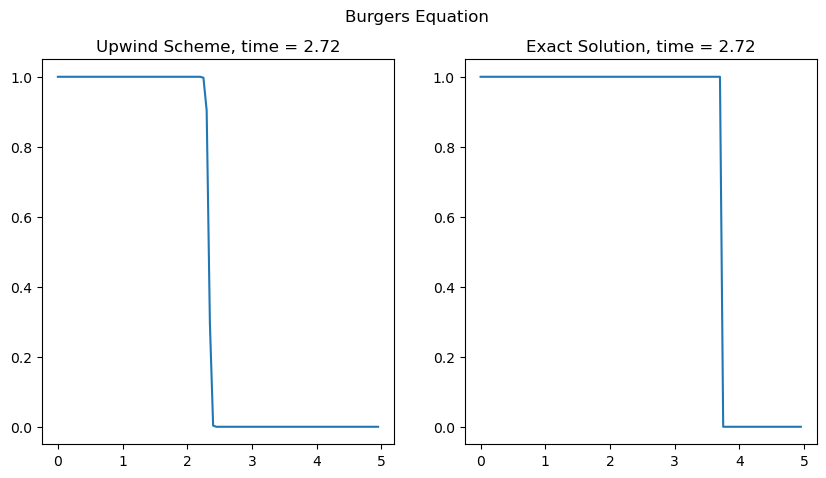

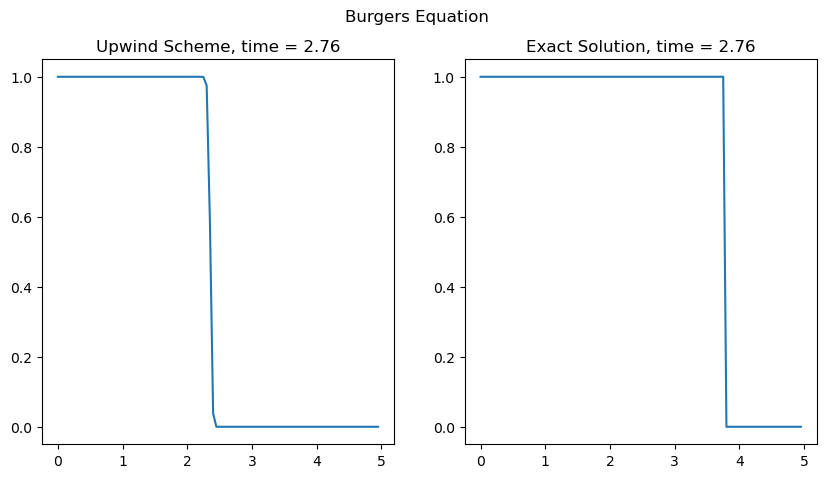

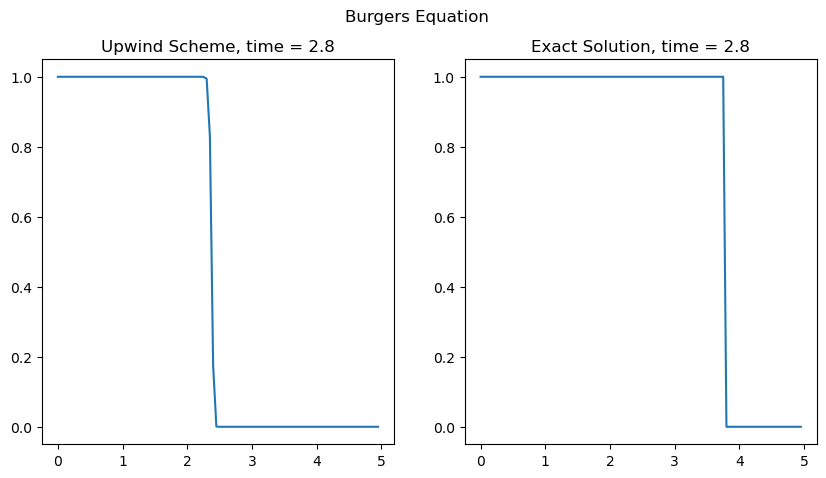

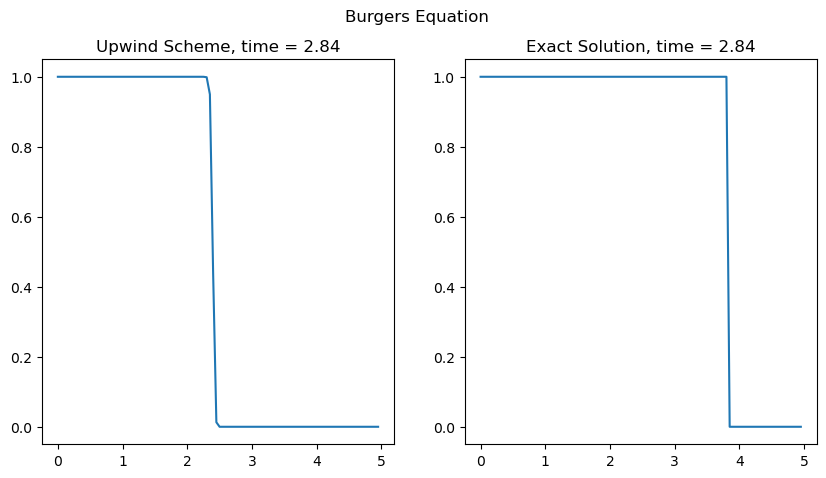

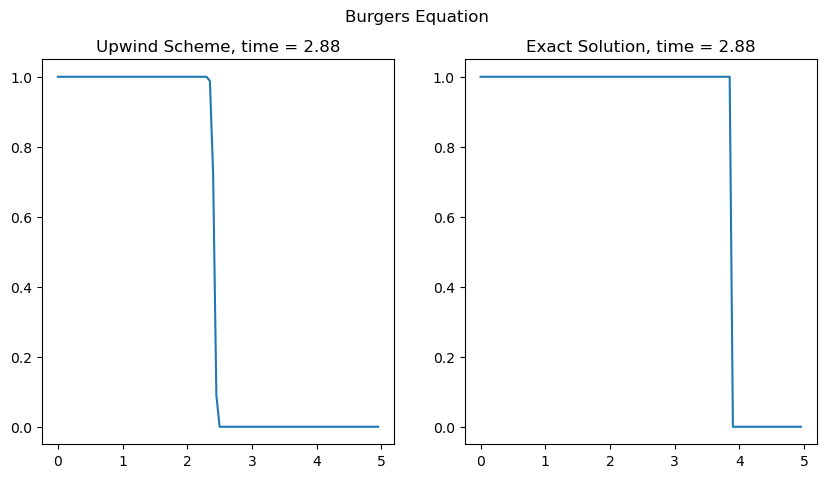

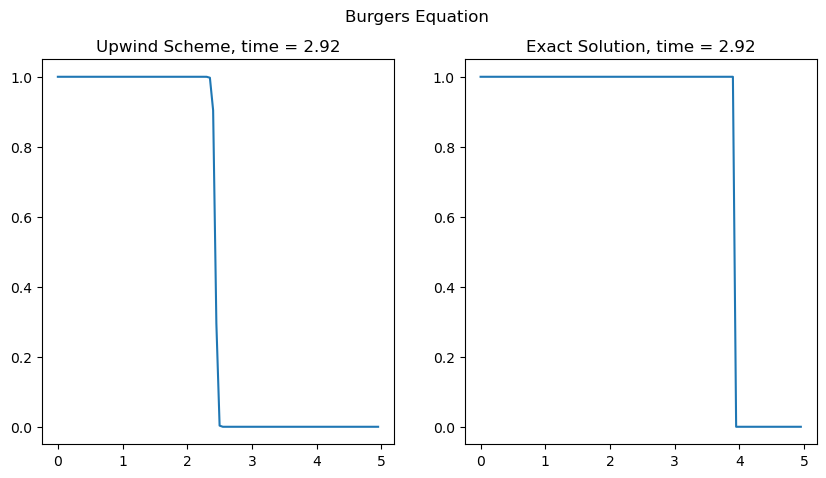

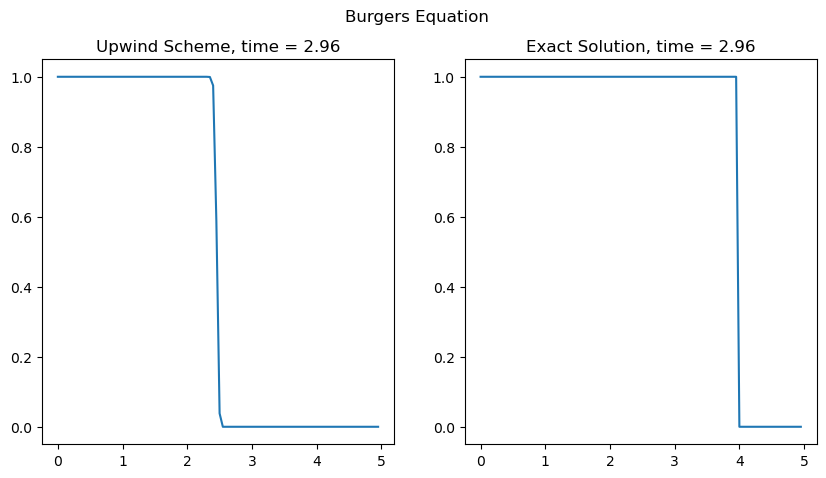

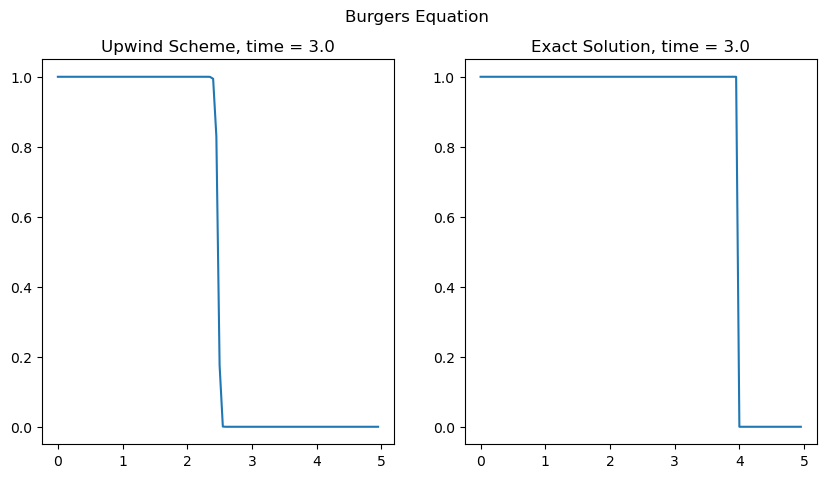

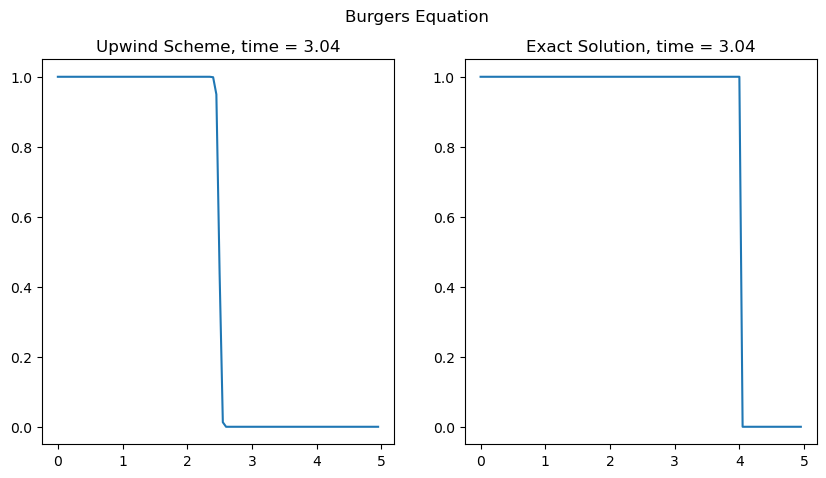

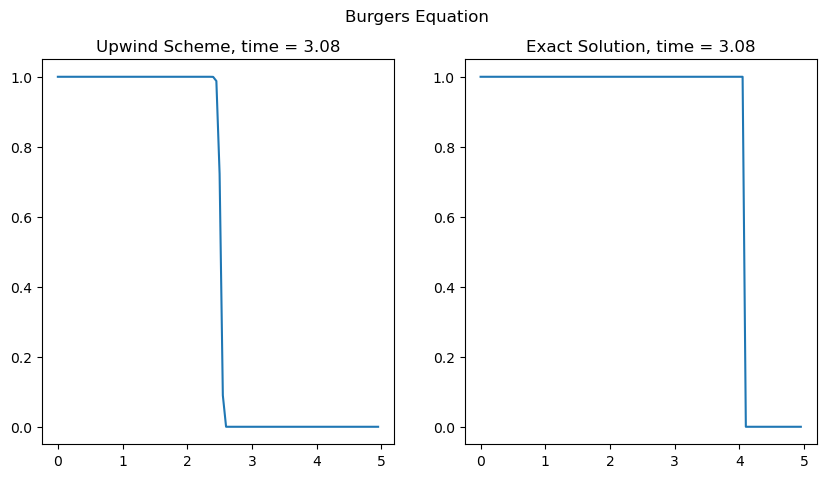

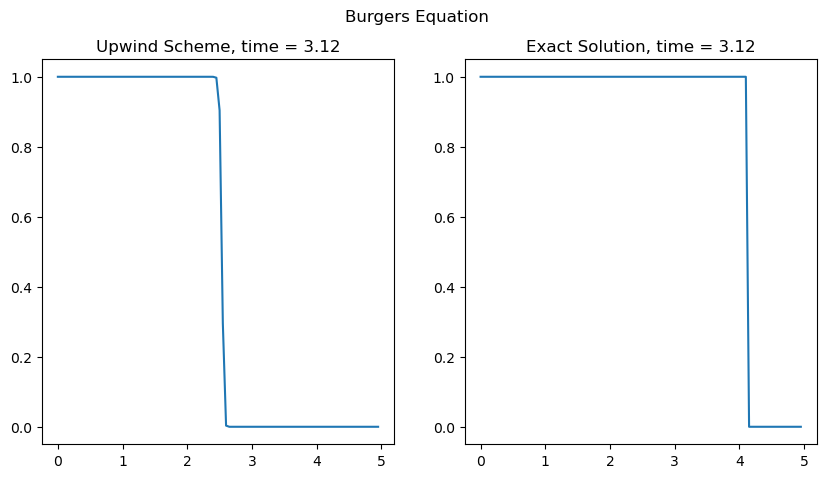

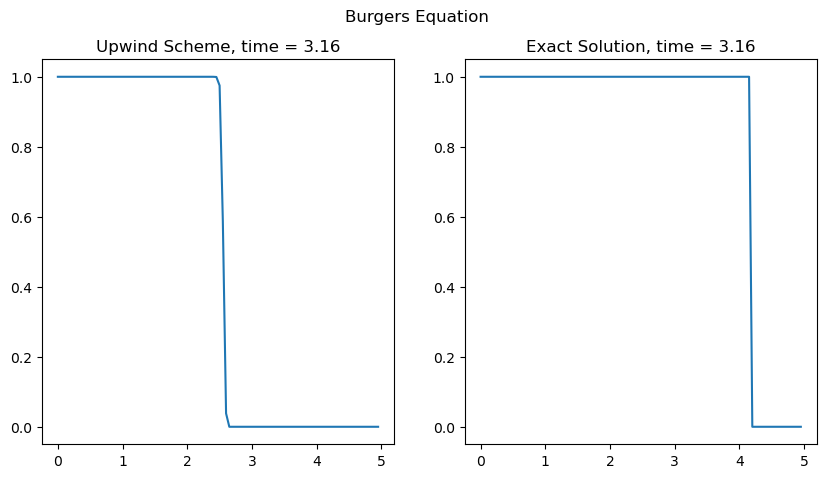

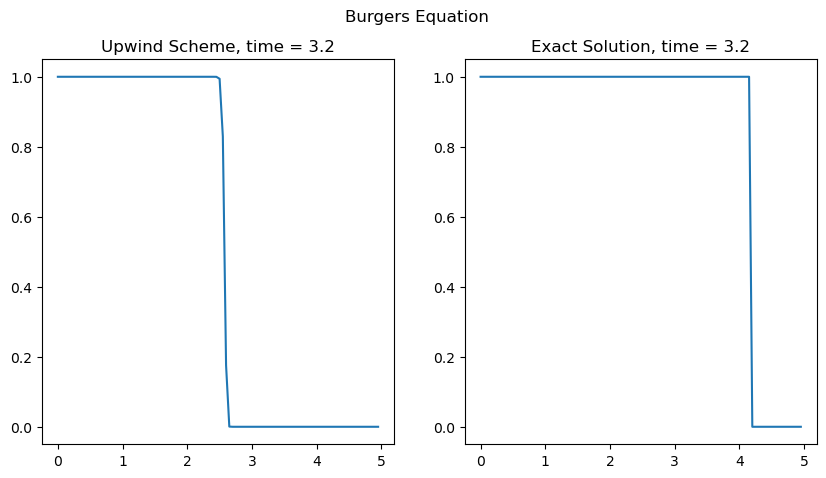

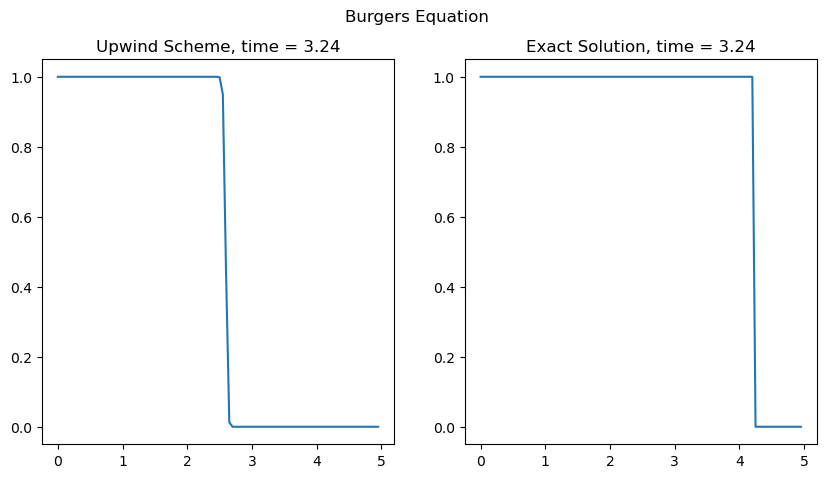

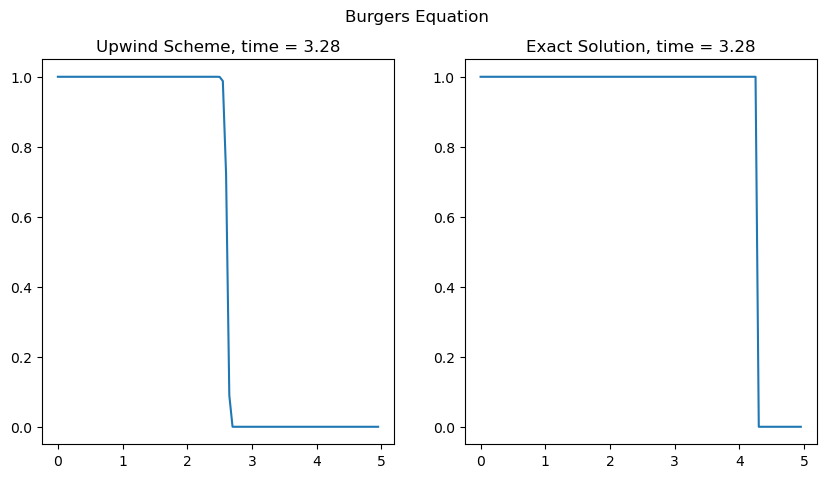

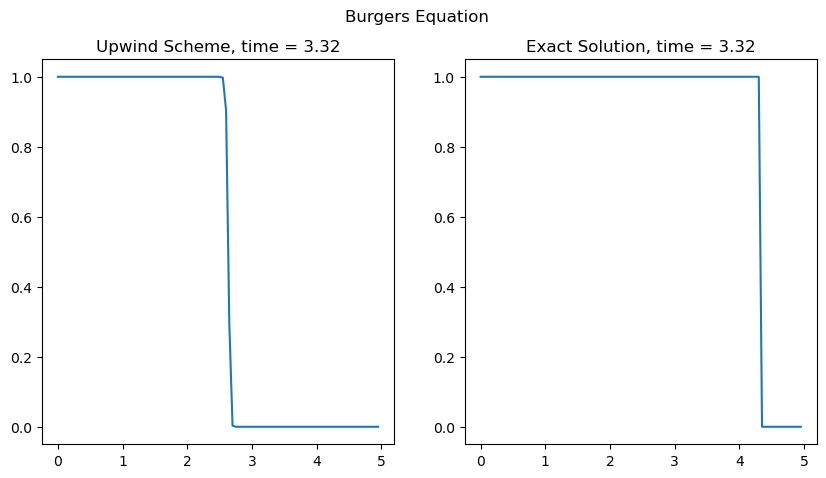

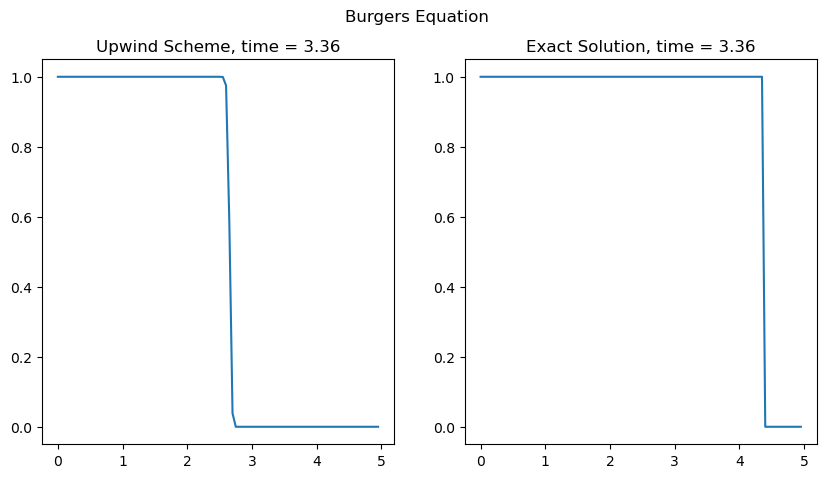

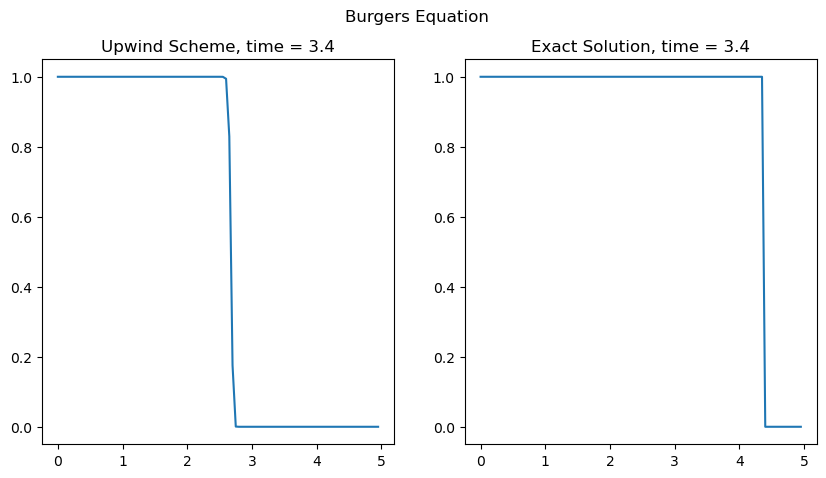

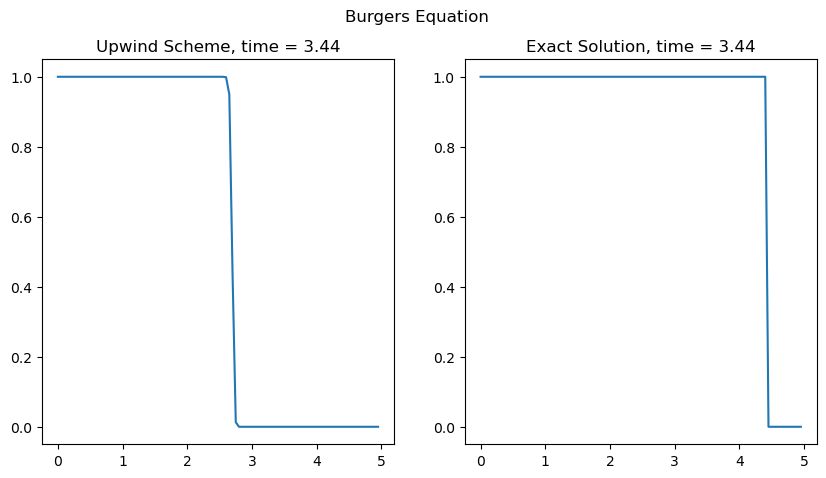

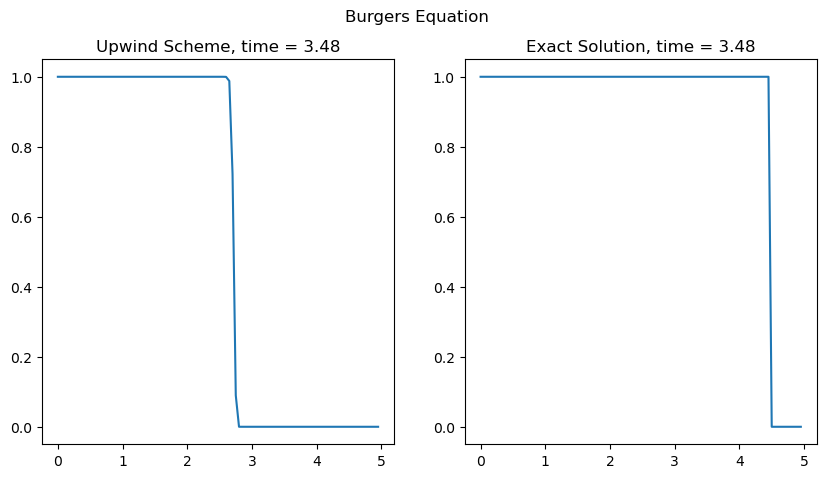

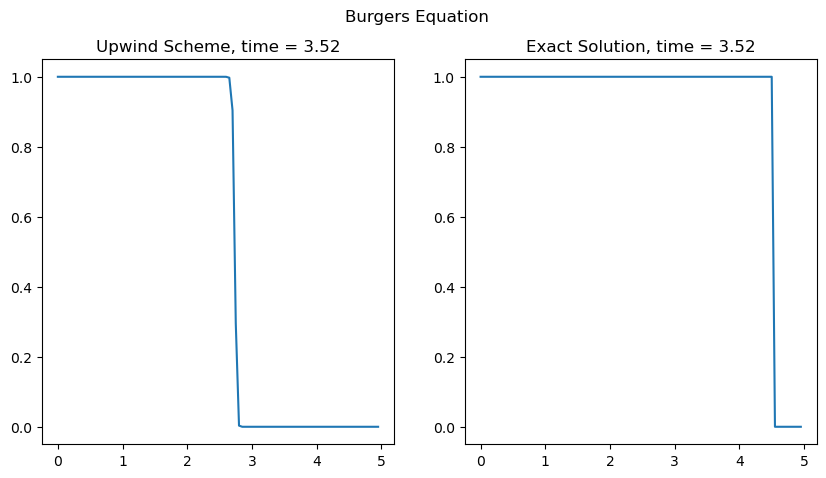

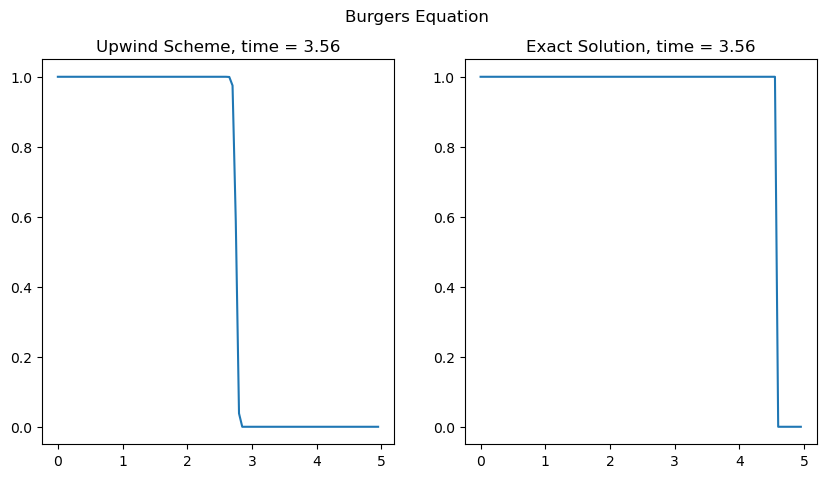

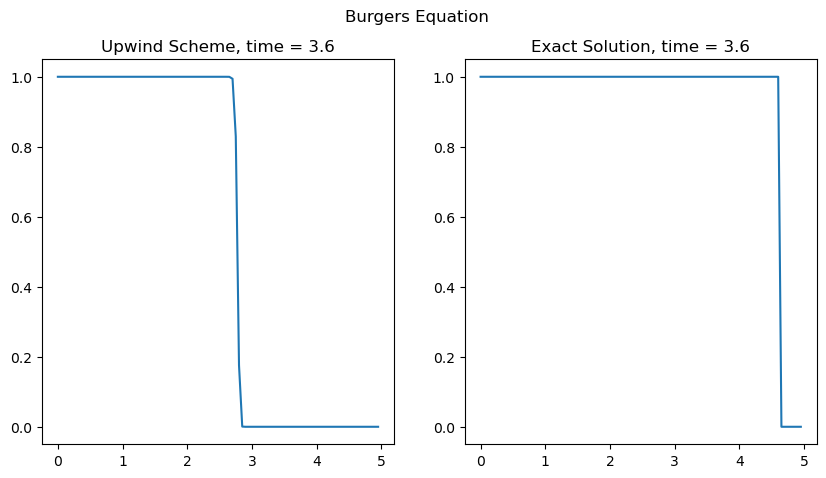

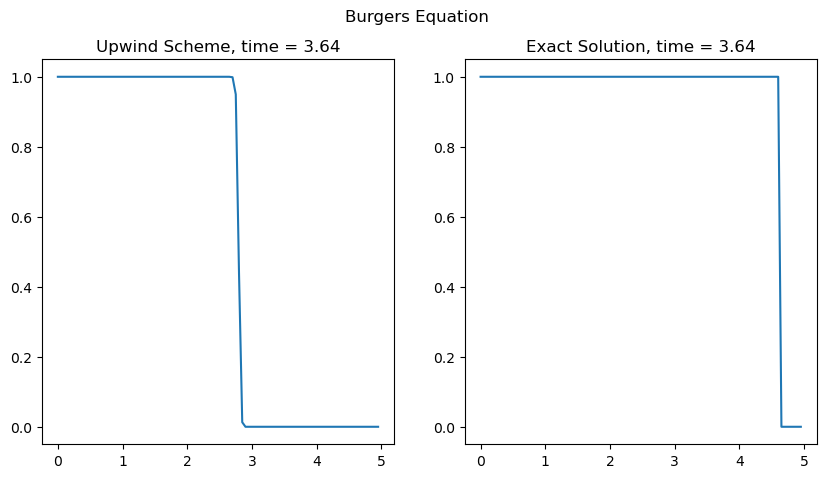

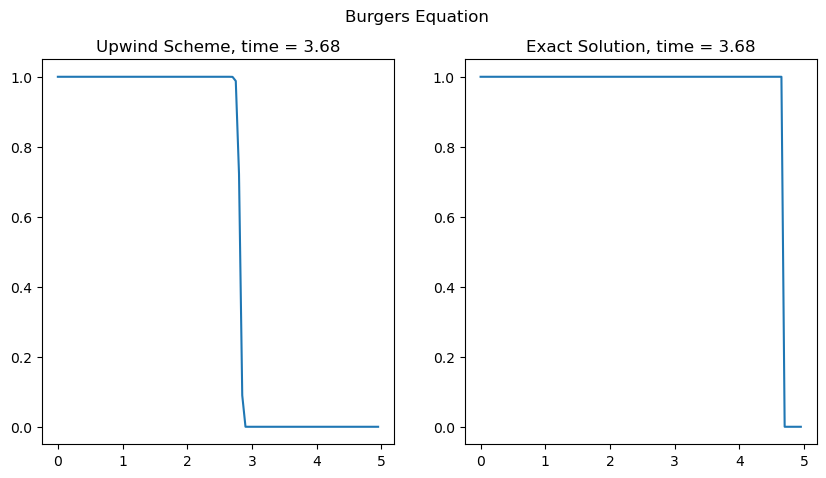

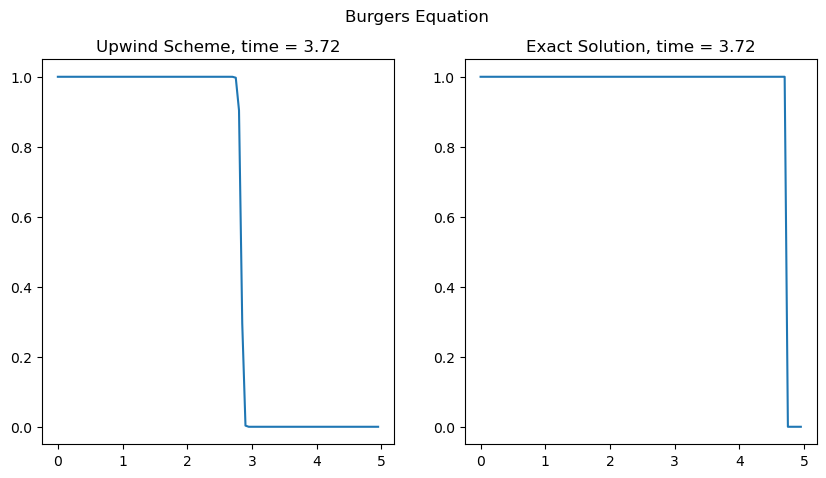

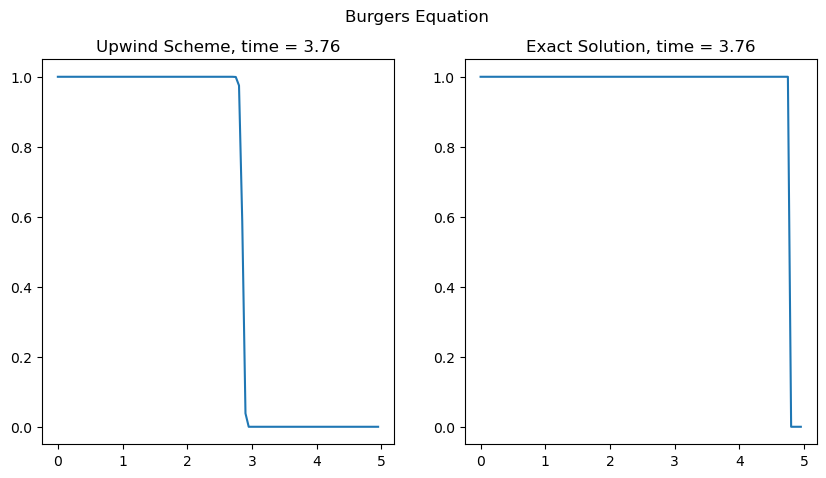

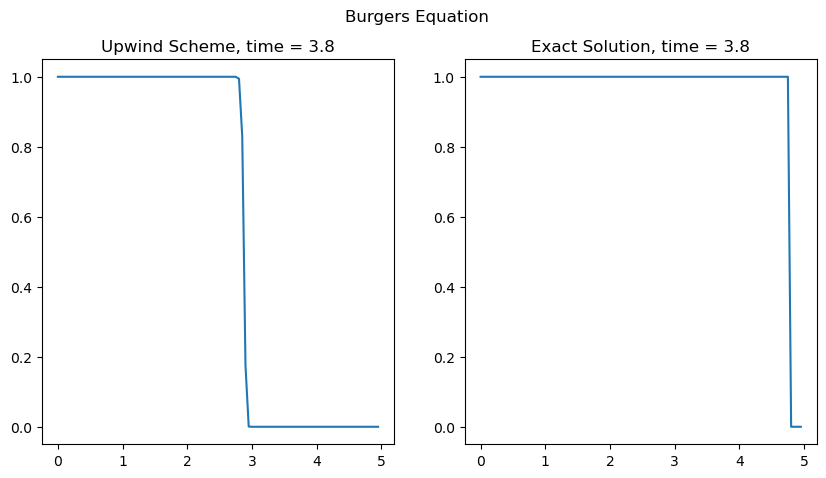

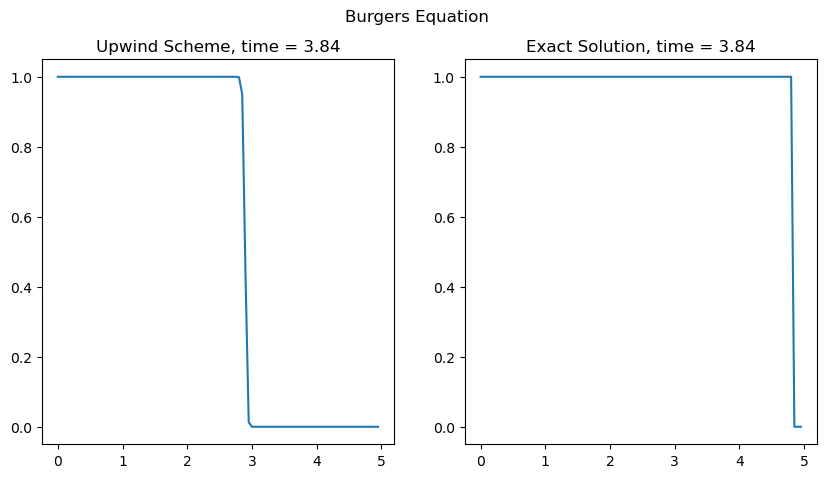

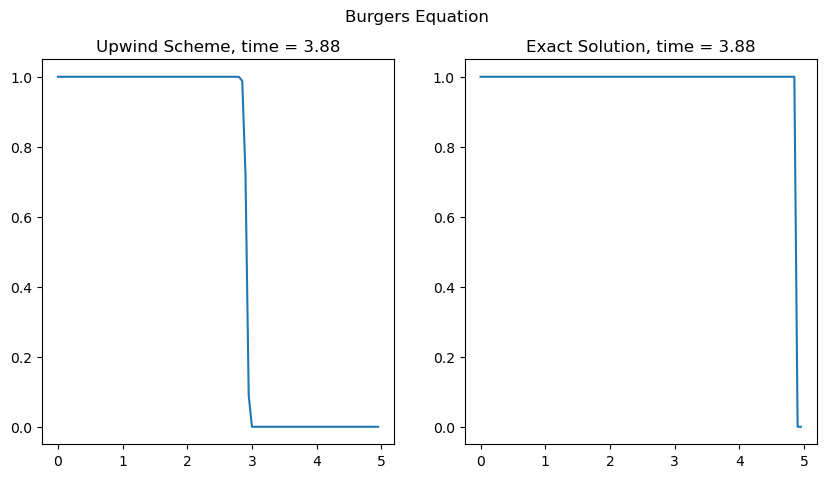

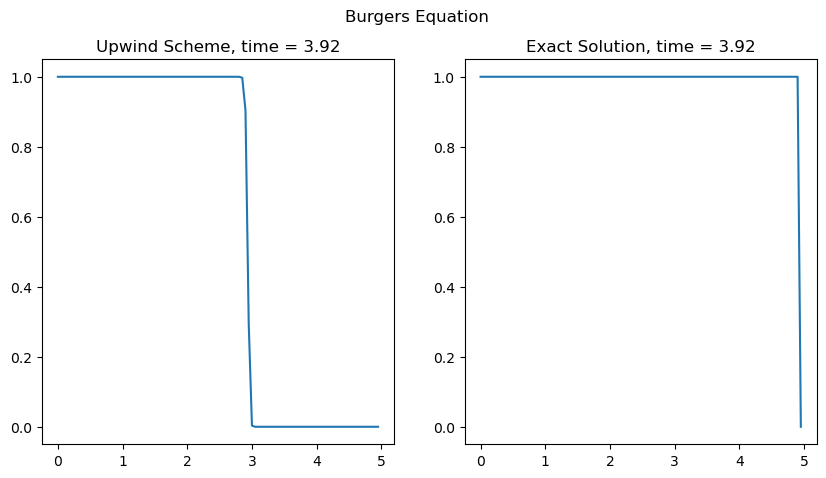

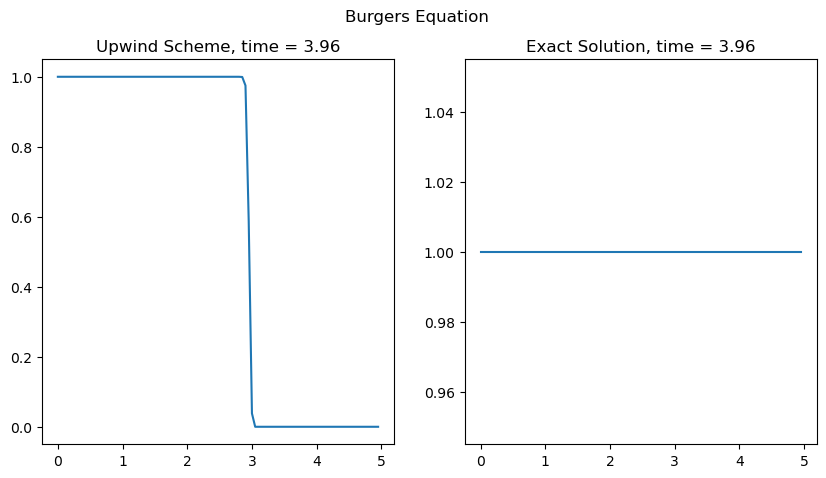

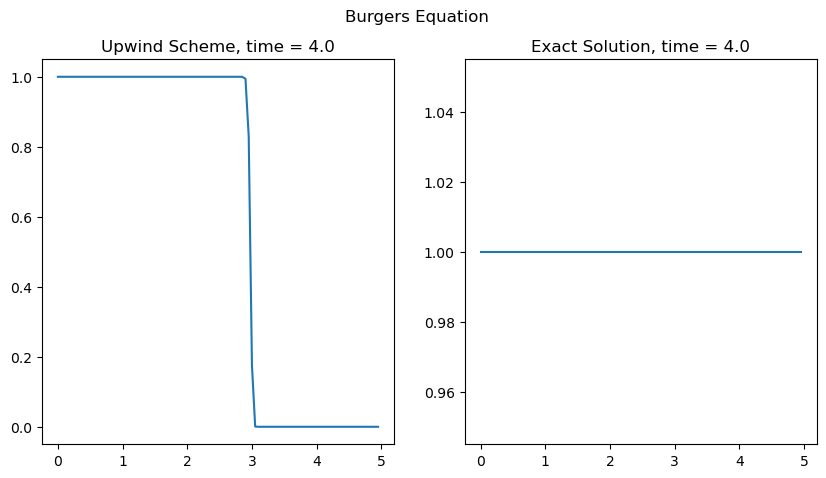

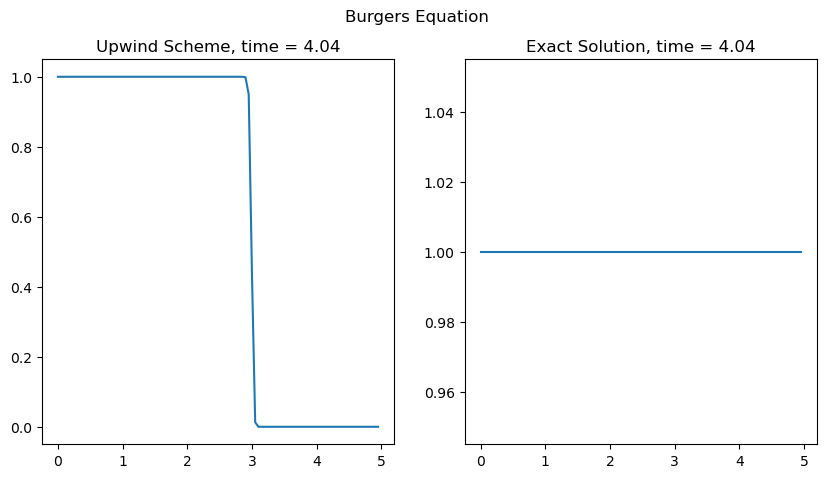

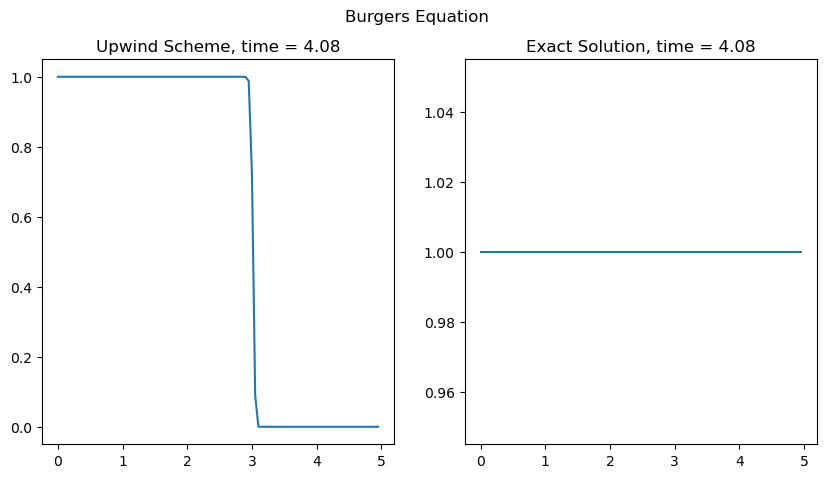

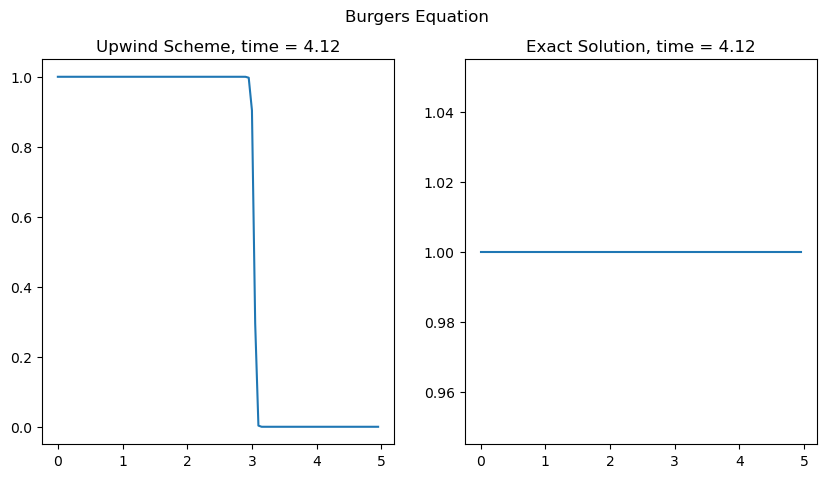

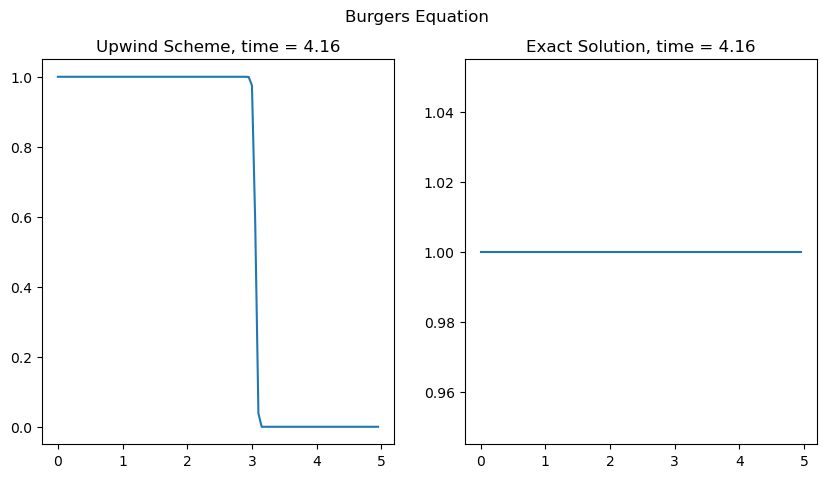

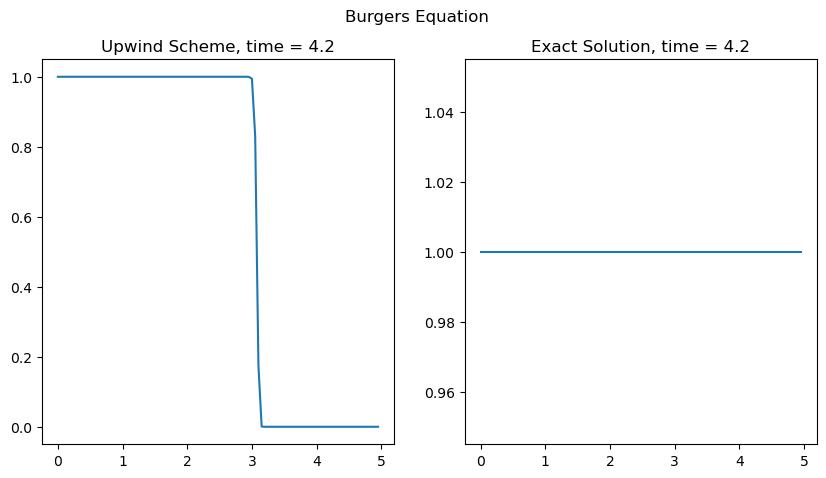

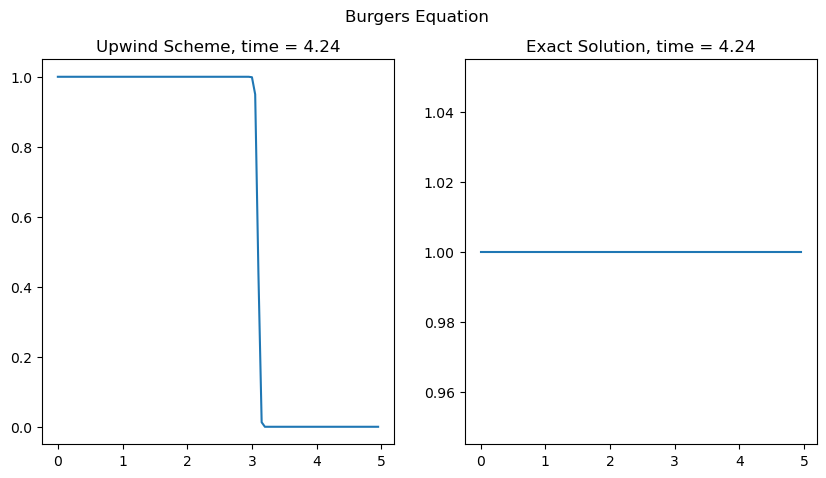

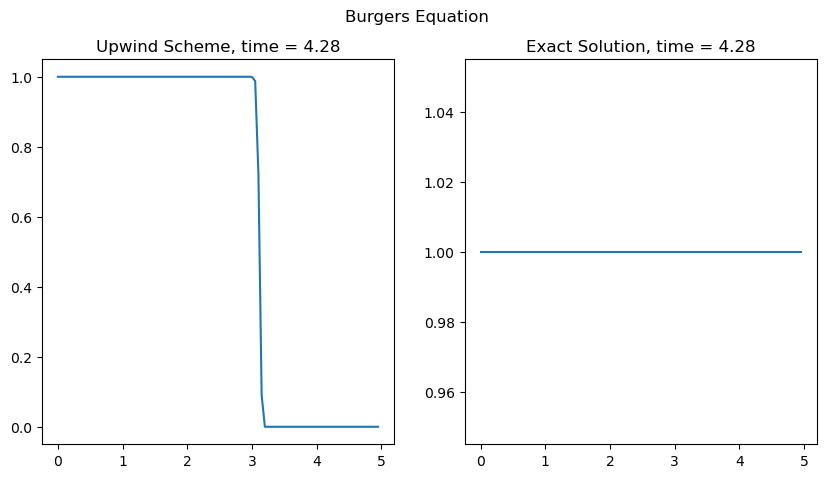

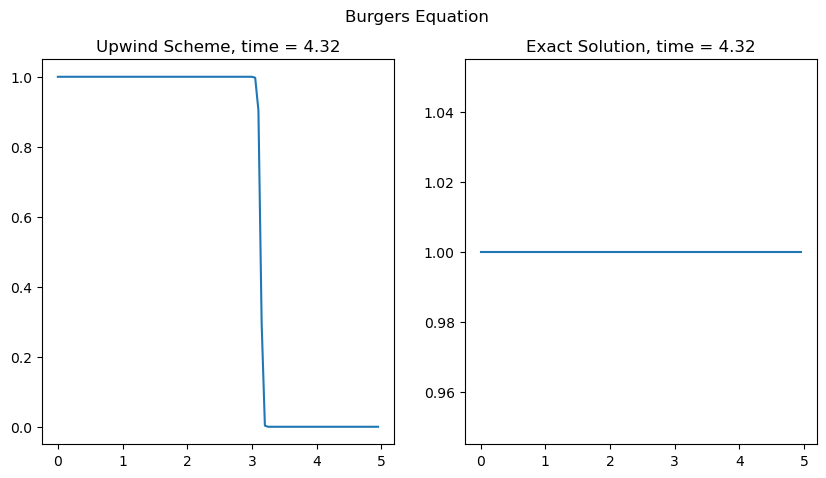

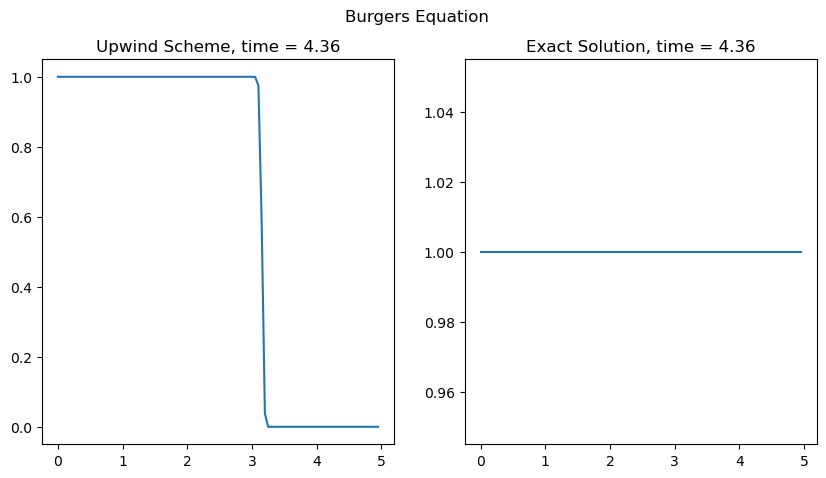

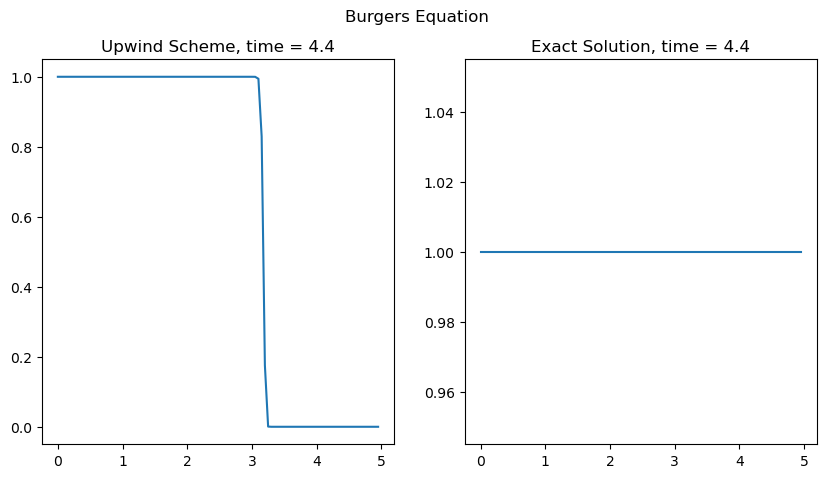

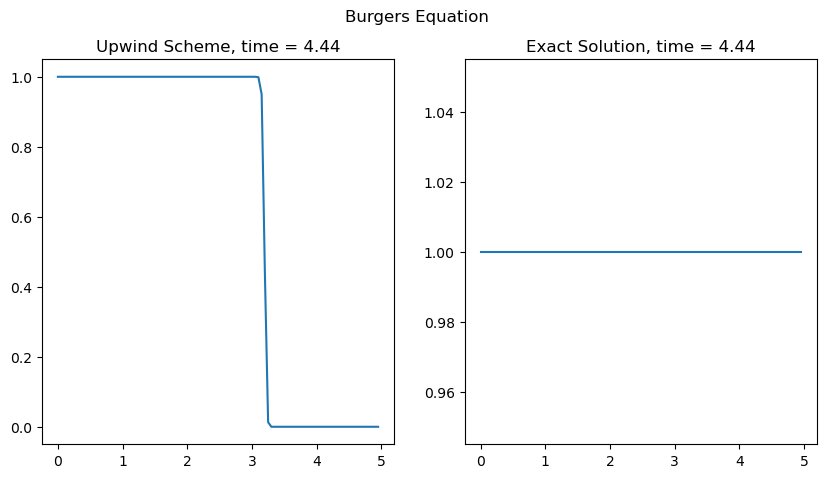

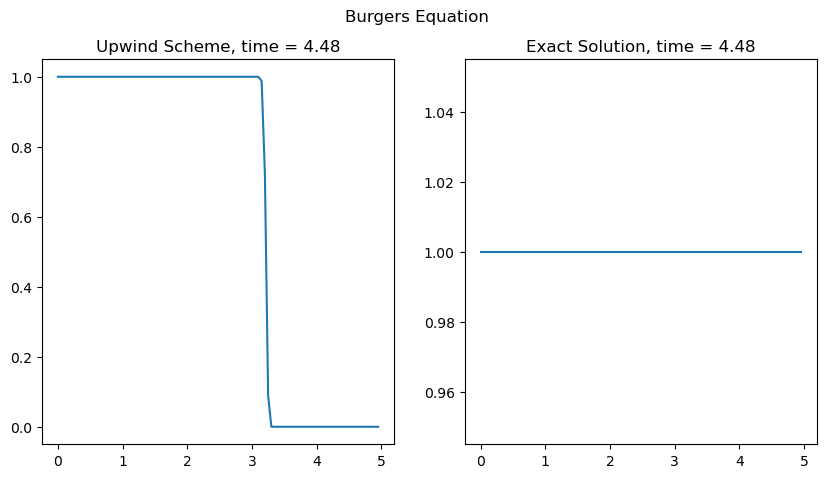

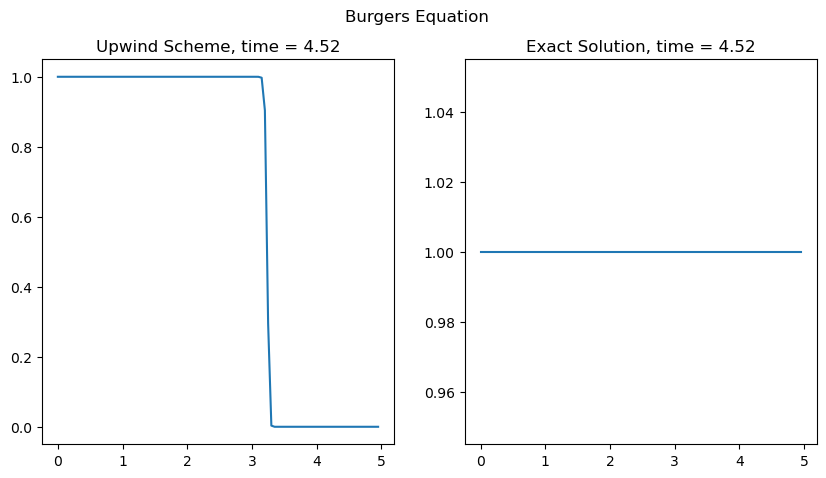

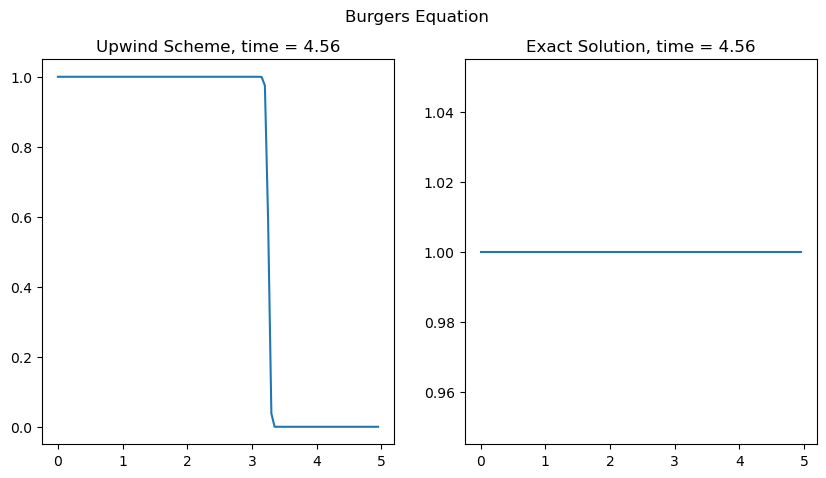

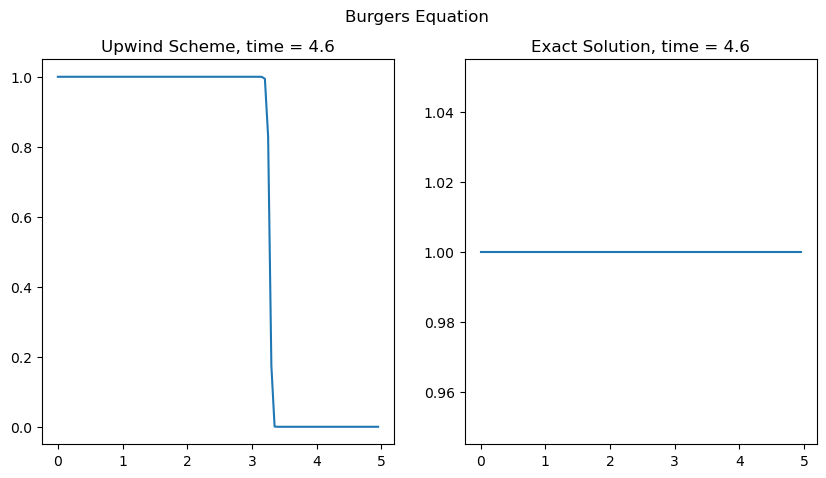

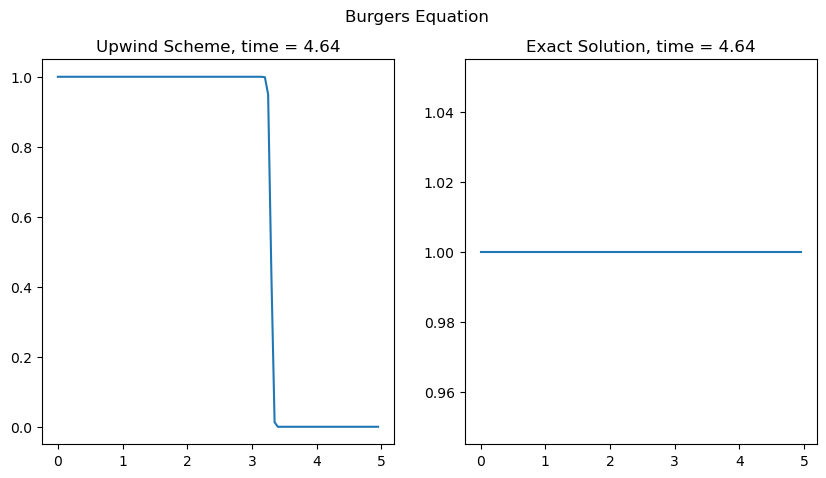

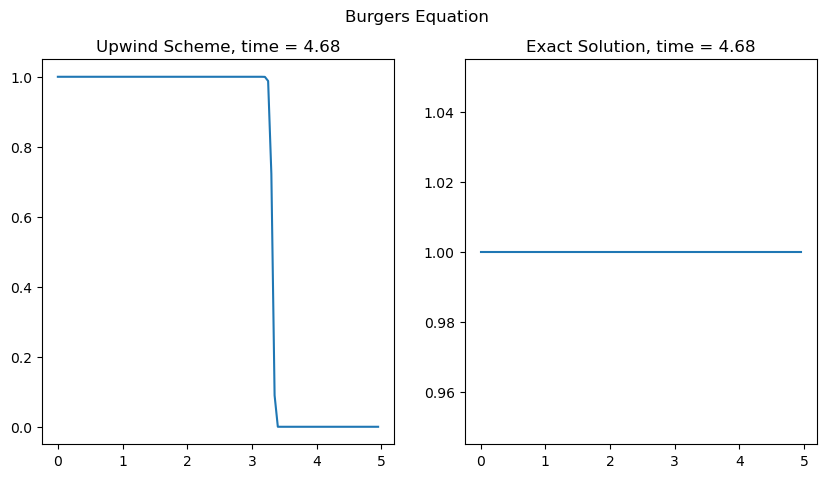

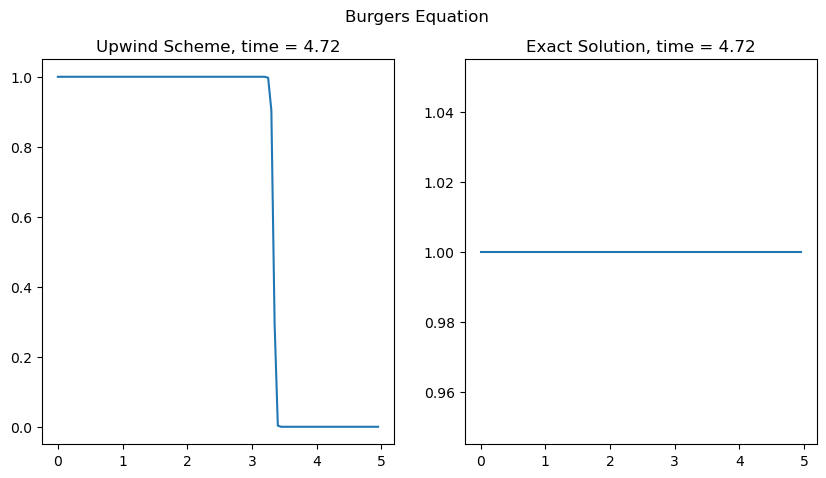

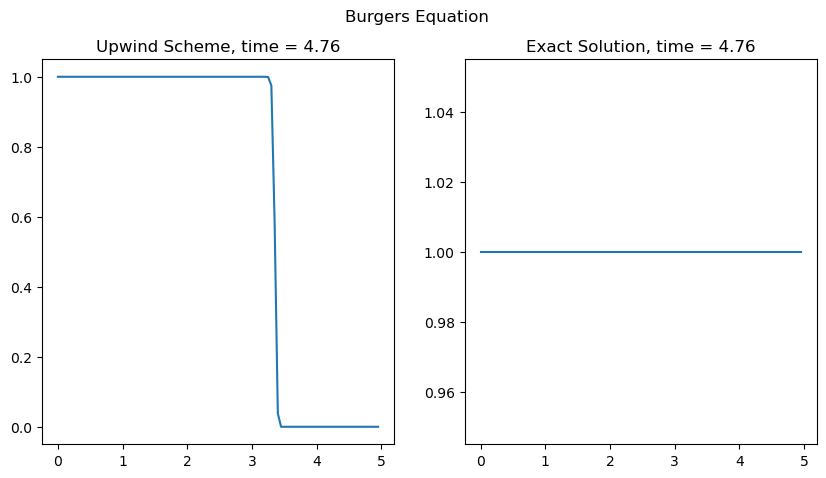

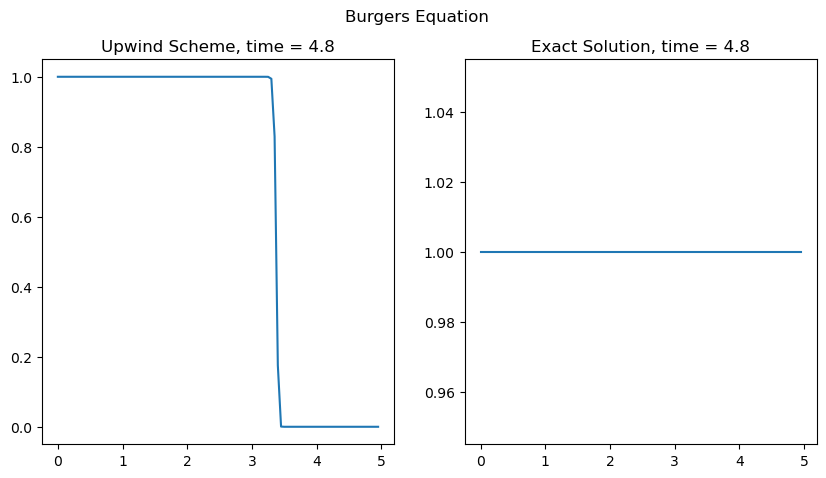

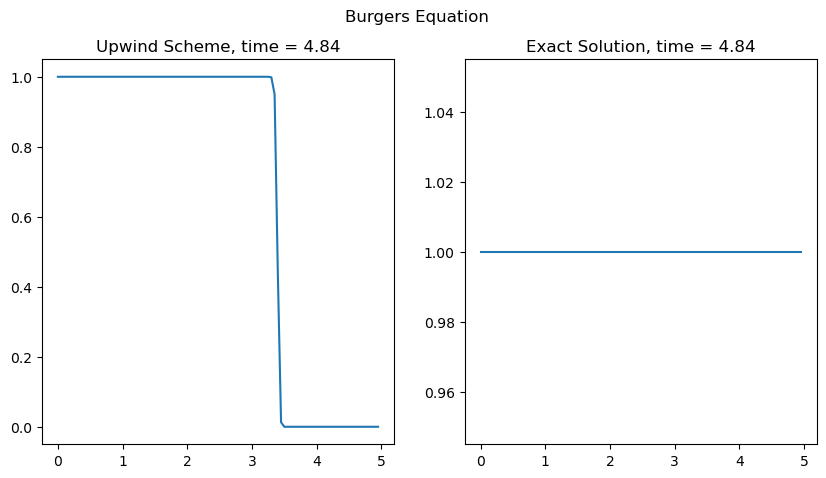

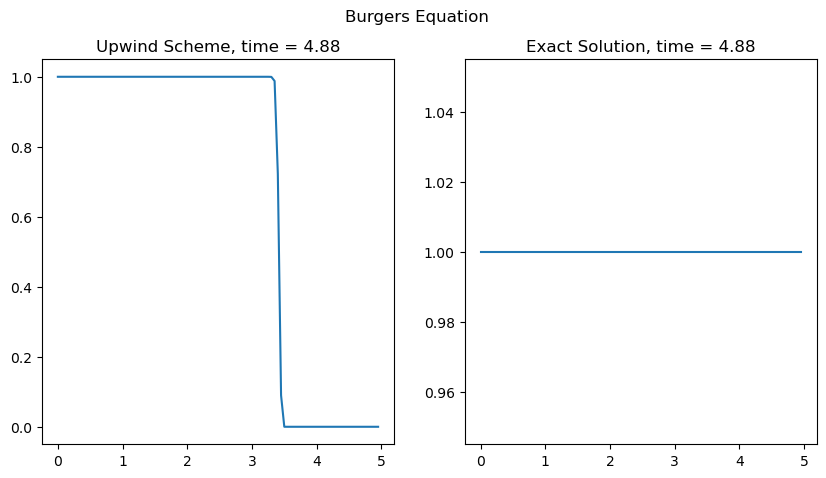

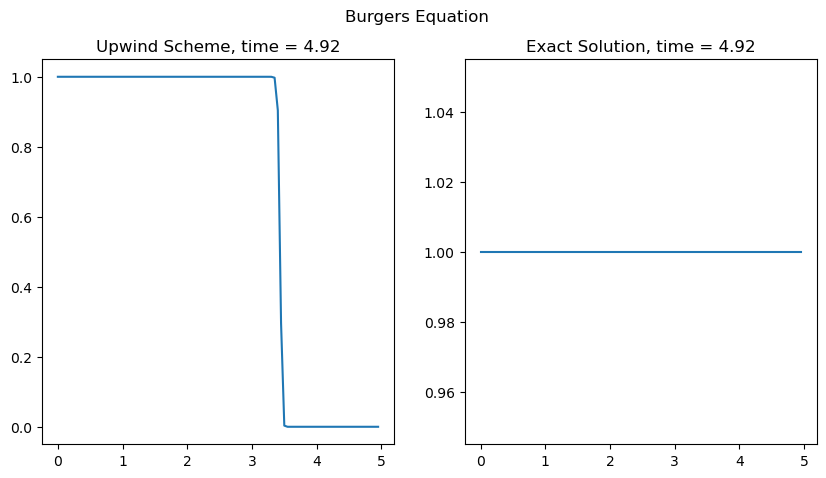

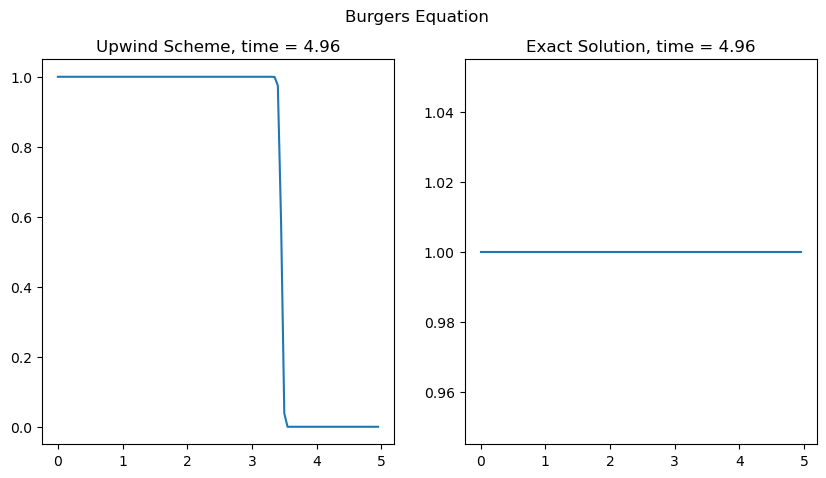

In [38]:
import matplotlib.pyplot as plt
dx = 0.05
dt = 0.04
N_x = int(5/dx)
N_t = int(5/dt)
U = upwind_burgers(dx,dt)
U_exact = exact_burgers(dx,dt)
# Generate some data for the line graphs
x = np.arange(0,5, dx)

for n in range(N_t):
    y1 = U[:,n]
    y2 = U_exact[:,n]

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first line graph in the first subplot
    axs[0].plot(x, y1)
    axs[0].set_title(f'Upwind Scheme, time = {5*n/N_t}')

    # Plot the second line graph in the second subplot
    axs[1].plot(x, y2)
    axs[1].set_title(f'Exact Solution, time = {5*n/N_t}')

    # Add a title to the figure
    fig.suptitle('Burgers Equation')

    # Display the figure
    plt.show()
